# Collaborative Based Filtering using MovieLens Dataset

## Loading the libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pprint import pprint
from sklearn.metrics import mean_absolute_error
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import keras

## Data Preparation

In [3]:
movies = pd.read_csv('../ml-latest-small/movies.csv')
ratings = pd.read_csv('../ml-latest-small/ratings.csv')
links = pd.read_csv('../ml-latest-small/links.csv')
tags = pd.read_csv('../ml-latest-small/tags.csv')

In [4]:
ratings.head() 

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
num_users = len(ratings.userId.unique())
num_items = len(ratings.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 610 unique users and 9724 unique movies in this data set


In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
user_maxId = ratings.userId.max()
item_maxId = ratings.movieId.max()
print('There are {} distinct users and the max of user ID is also {}'.format(num_users, user_maxId))
print('There are {} distinct movies, however, the max of movie ID is {}'.format(num_items, item_maxId))

There are 610 distinct users and the max of user ID is also 610
There are 9724 distinct movies, however, the max of movie ID is 193609


#### Merging required datasets

In [8]:
merged_dataset = pd.merge( movies,ratings , how='inner', on='movieId')
merged_dataset.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


A dataset is created from the existing merged dataset by grouping the unique user id and movie title combination and the ratings by a user to the same movie in different instances (timestamps) are averaged and stored in the new dataset.

In [9]:
merged_dataset[(merged_dataset['title'] == 'Chasing Amy (1997)')]

,movieId,title,genres,userId,rating,timestamp
33877,1639,Chasing Amy (1997),Comedy|Drama|Romance,13,4.0,987456818
33878,1639,Chasing Amy (1997),Comedy|Drama|Romance,24,3.0,1458941213
33879,1639,Chasing Amy (1997),Comedy|Drama|Romance,33,5.0,939654815
33880,1639,Chasing Amy (1997),Comedy|Drama|Romance,44,5.0,895853739
33881,1639,Chasing Amy (1997),Comedy|Drama|Romance,45,4.0,950726106
33882,1639,Chasing Amy (1997),Comedy|Drama|Romance,51,5.0,1230929619
33883,1639,Chasing Amy (1997),Comedy|Drama|Romance,64,3.5,1161521371
33884,1639,Chasing Amy (1997),Comedy|Drama|Romance,66,4.5,1099188155
33885,1639,Chasing Amy (1997),Comedy|Drama|Romance,100,3.5,1100184117
33886,1639,Chasing Amy (1997),Comedy|Drama|Romance,113,2.0,980051638


In [10]:
min_rating = min(merged_dataset['rating'])
max_rating = max(merged_dataset['rating'])
min_rating, max_rating

(0.5, 5.0)

## Creating a final refined dataset with unique user id, movie name combination and their ratings:


In [11]:
refined_dataset = merged_dataset.groupby(by=['userId','title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,userId,title,rating
0,1,"13th Warrior, The (1999)",4.0
1,1,20 Dates (1998),4.0
2,1,"Abyss, The (1989)",4.0
3,1,"Adventures of Robin Hood, The (1938)",5.0
4,1,Alice in Wonderland (1951),5.0


## Encoding users and movie titles to make sure that the sequence has no missing values when dealing with Deep Neural Networks.

In [12]:
#Encode target labels with value between 0 and n_classes-1.
user_enc = LabelEncoder()
refined_dataset['user'] = user_enc.fit_transform(refined_dataset['userId'].values)
n_users = refined_dataset['user'].nunique()

In [13]:
item_enc = LabelEncoder()
refined_dataset['movie'] = item_enc.fit_transform(refined_dataset['title'].values)
n_movies = refined_dataset['movie'].nunique()

In [14]:
n_users = merged_dataset['userId'].nunique()
n_movies = merged_dataset['movieId'].nunique()
refined_dataset['rating'] = refined_dataset['rating'].values.astype(np.float32)
min_rating = min(refined_dataset['rating'])
max_rating = max(refined_dataset['rating'])
n_users, n_movies, min_rating, max_rating

(610, 9724, 0.5, 5.0)

In [15]:
refined_dataset.head()

,userId,title,rating,user,movie
0,1,"13th Warrior, The (1999)",4.0,0,48
1,1,20 Dates (1998),4.0,0,66
2,1,"Abyss, The (1989)",4.0,0,202
3,1,"Adventures of Robin Hood, The (1938)",5.0,0,245
4,1,Alice in Wonderland (1951),5.0,0,325


## Splitting the data into training , validation and testing

In [16]:
# Let's say we want to split the data in 75:10:15 for train:valid:test dataset
train_size=0.75

X = refined_dataset[['user', 'movie']].values
y = refined_dataset['rating'].values

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.75)
#print(y_train)
# Now since we want the valid and test size to be 10% and 15% respectively 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.6
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.6)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(75624, 2)
(75624,)
(10083, 2)
(10083,)
(15125, 2)
(15125,)


(None, None)

In [17]:
X_test

array([[ 176, 9326],
       [ 550, 1094],
       [ 104,   79],
       ...,
       [ 605, 5833],
       [ 461, 6845],
       [ 316, 8884]])

In [18]:
print(X_test[:, 0])

[176 550 104 ... 605 461 316]


In [19]:
 X_test[:, 1]

array([9326, 1094,   79, ..., 5833, 6845, 8884])

## Defining number of factors which are to be considered by the Embedding layer

Columns in the input array are split into two separate arrays. As Keras considers them as two distinct inputs, each input needs to be fed in as its own array.

In [20]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]
X_valid_array = [X_valid[:, 0], X_valid[:, 1]]

## Normalizing the labels

In [21]:
y_train_array = (y_train - min_rating)/(max_rating - min_rating)
y_test_array = (y_test - min_rating)/(max_rating - min_rating)
y_valid_array = (y_valid - min_rating)/(max_rating - min_rating)

In [22]:
y_train_array

array([0.       , 0.5555556, 1.       , ..., 1.       , 0.8888889,
       0.6666667], dtype=float32)

In [23]:
decs =1
for i,element in enumerate(y_train_array):
    y_train_array[i] = np.trunc(element*10**decs)/(10**decs)
for i,element in enumerate(y_test_array):
    y_test_array[i] = np.trunc(element*10**decs)/(10**decs)
for i,element in enumerate(y_valid_array):
    y_valid_array[i] = np.trunc(element*10**decs)/(10**decs)

In [24]:
print(y_train_array)

[0.  0.5 1.  ... 1.  0.8 0.6]


In [25]:
print((y_train))

[0.5 3.  5.  ... 5.  4.5 3.5]


## Building a Deep Neural Network
The embedding layer in Keras can be used when we want to create the embeddings to embed higher dimensional data into lower dimensional vector space.

Dense implements the operation: output = activation(dot(input, kernel) + bias) 

units: Positive integer, dimensionality of the output space.

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. 

In [26]:
#n_users, n_movies = len(refined_dataset.userId.unique()), len(refined_dataset.movieId.unique())
n_latent_factors_user = 150
n_latent_factors_movie = 150

movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
movie_vec = keras.layers.Dropout(0.2,name='Dropout_1')(movie_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors_user, name='User-Embedding')(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)
user_vec = keras.layers.Dropout(0.2, name='Dropout_2')(user_vec)


concat = keras.layers.Concatenate()([movie_vec, user_vec])
concat_dropout = keras.layers.Dropout(0.2)(concat)
#dense = keras.layers.Dense(300,name='FullyConnected-1', activation='relu')(concat)
#dropout_1 = keras.layers.Dropout(0.2,name='Dropout_3')(dense)
dense_2 = keras.layers.Dense(150,name='FullyConnected-2', activation='relu')(concat_dropout)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout_4')(dense_2)
dense_3 = keras.layers.Dense(100,name='FullyConnected-3', activation='relu')(dropout_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout_5')(dense_3)
dense_4 = keras.layers.Dense(50,name='FullyConnected-4', activation='relu')(dropout_3)
dropout_4 = keras.layers.Dropout(0.2,name='Dropout_6')(dense_4)

result1 = keras.layers.Dense(50, activation='relu',name='FullyConnected-5')(dropout_4)
#dropout_5 = keras.layers.Dropout(0.2,name='Dropout_7')(result1)
result2 = keras.layers.Dense(20, activation='relu',name='FullyConnected-6')(dense_4)
#dropout_6 = keras.layers.Dropout(0.5,name='Dropout_7')(result2)
result3 = keras.layers.Dense(10, activation='sigmoid',name='FullyConnected-7')(result2)
result = keras.layers.Dense(1)(result2)
adam = Adam(lr=0.005)
model = keras.Model([user_input, movie_input], result)
model.compile(optimizer='sgd',loss= 'mean_squared_error',metrics=[tf.keras.metrics.RootMeanSquaredError()])
#model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])



2022-08-14 19:56:51.898919: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-14 19:56:51.900409: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [27]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 150)       1458750     Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 150)       91650       User[0][0]                       
____________________________________________________________________________________________

## Train the model

In [28]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, mode='auto',min_lr=0.00001, verbose=1)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=1,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
history = model.fit(x = X_train_array, y = y_train_array, batch_size=64, epochs=10, verbose=1, validation_data=(X_valid_array, y_valid_array)
,shuffle=True,callbacks=[reduce_lr])


/Users/spoorthichinivar/opt/anaconda3/envs/newvenv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 75624 samples, validate on 10083 samples
Epoch 1/10
75624/75624 [==============================] - 21s 283us/step - loss: 0.0565 - root_mean_squared_error: 0.2633 - val_loss: 0.0528 - val_root_mean_squared_error: 0.2372
Epoch 2/10
75624/75624 [==============================] - 21s 276us/step - loss: 0.0524 - root_mean_squared_error: 0.2346 - val_loss: 0.0525 - val_root_mean_squared_error: 0.2330
Epoch 3/10
75624/75624 [==============================] - 21s 284us/step - loss: 0.0521 - root_mean_squared_error: 0.2320 - val_loss: 0.0522 - val_root_mean_squared_error: 0.2314
Epoch 4/10
75624/75624 [==============================] - 23s 308us/step - loss: 0.0518 - root_mean_squared_error: 0.2308 - val_loss: 0.0519 - val_root_mean_squared_error: 0.2305
Epoch 5/10
75624/75624 [==============================] - 22s 289us/step - loss: 0.0514 - root_mean_squared_error: 0.2301 - val_loss: 0.0514 - val_root_mean_squared_error: 0.2297
Epoch 6/10
75624/75624 [==============================]

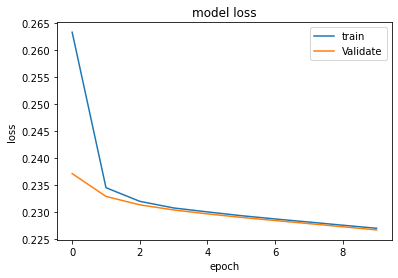

In [29]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "Validate"], loc="upper right")
plt.show()

In [30]:
score = model.evaluate(X_test_array,y_test_array)

print("Test Loss RMSE:", score[1])

15125/15125 [==============================] - 1s 62us/step
Test Loss RMSE: 0.2266407012939453


## Movies recommended with the help of Softmax Deep Neural Networks

## Summing up the entire code into a recommender system function:

In [31]:
def recommender_system(user_id, model, n_movies):

  print("")
  print("Movie seen by the User : "+str(user_id))
  pprint(list(refined_dataset[refined_dataset['userId'] == user_id]['title'])[:10])
  print("")

  encoded_user_id = user_enc.transform([user_id])
  
  seen_movies = list(refined_dataset[refined_dataset['userId'] == user_id]['movie'])
  unseen_movies = [i for i in range(min(refined_dataset['movie']), max(refined_dataset['movie'])+1) if i not in seen_movies]

  model_input = [np.asarray(list(encoded_user_id)*len(unseen_movies)), np.asarray(unseen_movies)]
  #print(model_input)
  predicted_ratings = model.predict(model_input)
  print(len(predicted_ratings))
  predicted_ratings = np.max(predicted_ratings, axis=-1)
  print(len(predicted_ratings))
  #print(predicted_ratings * (max_rating - min_rating) + min_rating)
  #print(type(predicted_ratings))
  sorted_index = np.argsort(predicted_ratings)[::-1]
  #print(sorted_index)
  recommended_movies = item_enc.inverse_transform(sorted_index)
  print("---------------------------------------------------------------------------------")
  print("Top "+str(n_movies)+" Movie recommendations for the User "+str(user_id)+ " are:")
  #pprint(list(recommended_movies[:n_movies]))
  return recommended_movies[:n_movies]

In [32]:
print("Enter user id")
user_id= int(input())

print("Enter number of movies to be recommended:")
n_movies = int(input())
recommendations = recommender_system(user_id,model,n_movies)
pprint(list(recommendations))


Enter user id
12
Enter number of movies to be recommended:
20

Movie seen by the User : 12
["'burbs, The (1989)",
 '10 Things I Hate About You (1999)',
 'Beavis and Butt-Head Do America (1996)',
 'Big Daddy (1999)',
 'Billy Elliot (2000)',
 'Circle of Friends (1995)',
 'Clueless (1995)',
 'Deep Impact (1998)',
 'Emma (1996)',
 'First Knight (1995)']

9687
9687
---------------------------------------------------------------------------------
Top 20 Movie recommendations for the User 12 are:
['Three Kings (1999)',
 'Head Over Heels (2001)',
 'Billy Madison (1995)',
 'Monsters, Inc. (2001)',
 "Kid in King Arthur's Court, A (1995)",
 'Used People (1992)',
 'SUBWAYStories: Tales from the Underground (1997)',
 'Amityville Horror, The (1979)',
 "We Don't Live Here Anymore (2004)",
 'The Man from Nowhere (2010)',
 '3-Iron (Bin-jip) (2004)',
 'Iron Man 2 (2010)',
 'Hannibal Rising (2007)',
 'Wuthering Heights (1992)',
 'Good Son, The (1993)',
 'Ace Ventura: Pet Detective (1994)',
 'Butterfield 

## Evaluate the recommender

In [33]:
X_test

array([[ 176, 9326],
       [ 550, 1094],
       [ 104,   79],
       ...,
       [ 605, 5833],
       [ 461, 6845],
       [ 316, 8884]])

In [34]:
test_set = pd.DataFrame(X_test)
test_set

,0,1
0,176,9326
1,550,1094
2,104,79
3,581,8002
4,116,7555
...,...,...
15120,306,1637
15121,447,7234
15122,605,5833
15123,461,6845


In [35]:
users = X_test[:, 0]
#print(users)
users =(list(set(users)))

overall_precision = list()
overall_recall = list()
overall_FScore = list()
#for user in users:
#    movies = [row[1] for i,row in test_set.iterrows() if row[0]==user]
#    model_input = [np.asarray(list(user)*len(movies)), np.asarray(movies)]
k = 150
for i, user_movie in test_set.groupby(0):
    model_input = user_movie
    test = [model_input[0], model_input[1]]
    
    predicted_ratings = model.predict(test)
    decs = 1
    predicted = predicted_ratings
    for i,element in enumerate(predicted):
        predicted[i] = np.trunc(element*10**decs)/(10**decs)
    #print(predicted_ratings)

    ratings = {0.5 :0, 1:0.1, 1.5:0.2, 2:0.3, 2.5:0.4, 3:0.5, 3.5:0.6, 4:0.7, 4.5:0.8, 5:0.9}
    for key,val in ratings.items():
        for i,element in enumerate(predicted):
        #print(pred)
            if predicted[i] == val:
                predicted[i] = key
    predicted =  np.ravel(predicted)
   
   
    user = model_input[0].unique()
    actual_rating = [row.rating  for i,row in refined_dataset.iterrows() for mov in model_input[1] if row.user==user and row.movie == mov]
 
    data ={
      "user":model_input[0],  
      "movie":model_input[1],
      "actual_rating":actual_rating,
      "predicted_rating": predicted }
    eval_df =pd.DataFrame(data)
    print(eval_df)

    predicted_ratings = np.max(predicted_ratings, axis=-1)
    sorted_index = np.argsort(predicted_ratings)[::-1]
    recommended_movies = item_enc.inverse_transform(sorted_index)
    print("---------------------------------------------------------------------------------")
    print("Top Movie recommendations for the User "+str(list(set(model_input[0])))+ " are:")
    print("---------------------------------------------------------------------------------")
    
    recommended_movies = list(set(recommended_movies))
    pprint(recommended_movies)
    print("Total unique movies recommended for user {} are : {}".format(user,len(recommended_movies)))
    ################
    k = 10
    rated_movie = eval_df.sort_values(by = 'predicted_rating', ascending = False).head(k)
    print(rated_movie)
    relevent_items = [row.movie for i, row in rated_movie.iterrows() if row.actual_rating > 2.5]
    
    relevent_items = pd.DataFrame(relevent_items, columns = ['movie'])
    
    count = [row.movie for i,row in rated_movie.iterrows() if  (abs(row.actual_rating - row.predicted_rating) == 0.5) or (abs(row.actual_rating - row.predicted_rating) == 0.0)]
    print(count)
   
    if len(count) == 0:
        precision_at_k = 0
        recall_at_k = 0
        
    else:
        precision_at_k = len(count)/rated_movie.shape[0]
        print("Precision for user {} : {}".format(user, precision_at_k))
        recall_at_k = len(count)/(relevent_items.shape[0])
        print("Recall for user {} :{} " .format(user , recall_at_k))
    overall_precision.append(precision_at_k)
    overall_recall.append(recall_at_k)


       user  movie  actual_rating  predicted_rating
279       0   3000            4.0               3.5
601       0   5856            5.0               3.5
648       0   7213            4.0               3.5
2550      0   4654            4.0               3.5
3129      0   4200            5.0               3.5
4039      0    405            5.0               3.5
4576      0   1025            5.0               3.5
5710      0    983            5.0               3.5
7857      0   2047            5.0               3.5
8682      0   1687            5.0               3.5
9030      0   3662            5.0               3.5
9257      0    327            5.0               3.5
9290      0   3158            5.0               3.5
10249     0   8823            4.0               3.5
10460     0   5604            4.0               3.5
10923     0   2885            4.0               3.5
11617     0   3890            5.0               3.5
11930     0   4854            5.0               3.5
12469     0 

       user  movie  actual_rating  predicted_rating
3467      4   7054            3.0               3.5
3865      4   5103            4.0               3.5
9132      4    207            3.0               3.5
13507     4    839            3.0               3.5
15118     4    713            3.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [4] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [4] are : 5
       user  movie  actual_rating  predicted_rating
3467      4   7054            3.0               3.5
3865      4   5103            4.0               3.5
9132      4    207            3.0               3.5
13507     4    839            3.0               3.5
15118     4    713     

      user  movie  actual_rating  predicted_rating
349      7   2619            4.0               3.5
2152     7   7593            3.0               3.5
2346     7   6039            5.0               3.5
4218     7   4398            3.0               3.5
5393     7   3996            5.0               3.5
7952     7   8949            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [7] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [7] are : 6
      user  movie  actual_rating  predicted_rating
349      7   2619            4.0               3.5
2152     7   7593            3.0               3.5
2346     7   6039            5.0               3.

      user  movie  actual_rating  predicted_rating
5191    13   2619            3.0               3.0
6334    13   9371            5.0               3.5
9727    13   7523            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [13] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [13] are : 3
      user  movie  actual_rating  predicted_rating
6334    13   9371            5.0               3.5
9727    13   7523            5.0               3.5
5191    13   2619            3.0               3.0
[2619.0]
Precision for user [13] : 0.3333333333333333
Recall for user [13] :0.3333333333333333 
       user  movie  actual_rating  predicted_rating
713      14   4334            4.0               3.5
959      14    435            4.5      

       user  movie  actual_rating  predicted_rating
111      18   6218            2.0               3.0
339      18   5867            2.0               3.0
603      18   7701            3.0               2.5
783      18   5537            2.0               3.0
822      18   2901            4.0               3.0
...     ...    ...            ...               ...
14577    18   2043            3.0               3.0
14663    18   5512            2.0               3.0
14762    18    327            2.0               3.0
14787    18   7163            2.0               3.0
14963    18   4077            4.0               3.0

[87 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [18] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '...All the Marbles (1981)',
 '13 Tzameti (2005)',
 '11th Hour, The (2007)',
 '10 Cent Pistol (2015)',
 '1

       user  movie  actual_rating  predicted_rating
343      21   4377            3.5               3.5
975      21   3534            4.5               3.5
1007     21   8391            1.5               3.5
1049     21   4301            4.0               3.5
1447     21   6983            1.0               3.5
2435     21   5890            1.0               3.5
2537     21   9695            5.0               3.5
4544     21   3474            4.0               3.5
4795     21   1547            4.0               3.5
5676     21   2059            0.5               3.5
7365     21   4017            4.5               3.5
7635     21   2488            2.5               3.5
8327     21   3967            4.0               3.5
8461     21   7268            0.5               3.5
10238    21   6713            2.0               3.5
10884    21   6872            4.0               3.5
11738    21   4659            3.5               3.5
11845    21   6646            3.0               3.5
14248    21 

       user  movie  actual_rating  predicted_rating
6809     25    836            3.0               3.5
9183     25    565            3.0               3.5
11021    25    713            3.0               3.5
14528    25    207            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [25] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Salem's Lot (2004)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [25] are : 4
       user  movie  actual_rating  predicted_rating
6809     25    836            3.0               3.5
9183     25    565            3.0               3.5
11021    25    713            3.0               3.5
14528    25    207            4.0               3.5
[836.0, 565.0, 713.0, 207.0]
Precision for user [25] : 1.0
Recall for user [25] :1.0 
       user  movi

      user  movie  actual_rating  predicted_rating
2407    29   5204            5.0               3.5
3231    29   3667            5.0               3.5
8610    29   4323            5.0               3.5
9552    29   1045            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [29] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Salem's Lot (2004)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [29] are : 4
      user  movie  actual_rating  predicted_rating
2407    29   5204            5.0               3.5
3231    29   3667            5.0               3.5
8610    29   4323            5.0               3.5
9552    29   1045            5.0               3.5
[]
       user  movie  actual_rating  predicted_rating
3462     30   3529            5.0               3.5
6016  

       user  movie  actual_rating  predicted_rating
195      33   9620            0.5               3.0
3886     33   4481            3.0               3.0
4671     33   7149            4.5               3.0
4748     33   5840            4.5               3.0
5772     33   6327            2.0               3.0
6678     33   8779            3.0               3.5
7690     33   4738            5.0               3.5
7823     33   4337            2.0               3.0
7894     33   1337            5.0               3.5
9075     33   5230            4.0               3.0
9909     33   7577            3.5               3.0
12015    33   7447            2.0               3.0
13121    33   9621            3.5               3.0
13371    33   7396            4.0               3.0
14010    33   5229            3.5               3.0
14109    33   5058            0.5               3.0
14530    33   6377            5.0               3.0
14824    33   7653            5.0               3.5
------------

       user  movie  actual_rating  predicted_rating
1755     38   6955            3.0               3.5
5330     38     24            5.0               3.5
5677     38   8636            2.0               3.5
6446     38   3008            5.0               3.5
7719     38   5512            5.0               3.5
8022     38   5872            2.0               3.5
9921     38   4766            5.0               3.5
11471    38   7523            4.0               3.5
12165    38   2459            3.0               3.5
13733    38   7182            3.0               3.5
14904    38   6812            2.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [38] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 "'Salem's Lot (2004)",
 '...All the Marbles (1981)',
 "'night Mother (1986)",
 '*batteries not included (1987)',
 "'Tis the Season

       user  movie  actual_rating  predicted_rating
1055     42   4342            3.0               3.5
1803     42   7328            5.0               3.5
1989     42   4131            3.0               3.5
2858     42   1337            5.0               3.5
3557     42    289            4.0               3.5
4222     42   4666            5.0               3.5
5822     42   3216            3.0               3.5
6699     42   6021            5.0               3.5
7780     42   1602            5.0               3.5
8438     42   2043            5.0               3.5
11650    42   4654            5.0               3.5
12642    42   8820            4.0               3.5
13894    42   5137            5.0               3.5
14024    42   8725            3.0               3.5
14235    42   1005            5.0               3.5
14303    42   4805            5.0               3.5
14930    42   3100            4.0               3.5
----------------------------------------------------------------

       user  movie  actual_rating  predicted_rating
745      46   9051            2.0               3.5
1188     46   5582            2.0               3.5
1315     46   3870            2.0               3.5
2582     46   3634            3.0               3.5
2920     46   2122            2.5               3.0
5097     46   2083            4.0               3.5
6092     46   6665            5.0               3.0
6281     46   8884            2.0               3.5
7053     46   1624            3.5               3.5
7971     46   6188            4.5               3.0
8629     46   6524            1.5               3.0
9323     46   7975            4.0               3.5
10737    46   1091            3.5               3.5
10920    46   1025            3.5               3.5
11519    46   1668            3.0               3.0
12644    46   5095            3.0               3.5
12966    46   3656            3.5               3.5
13061    46   5666            3.0               3.5
14472    46 

       user  movie  actual_rating  predicted_rating
18       50   1867            3.5               3.5
145      50   7997            5.0               3.5
164      50   4479            5.0               3.5
226      50   5932            3.5               3.5
320      50   3558            5.0               3.5
...     ...    ...            ...               ...
14593    50    514            2.5               3.5
14602    50    587            3.0               3.5
14734    50   3502            0.5               3.5
14911    50   2327            5.0               3.5
14971    50   3069            3.0               3.5

[62 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [50] are:
---------------------------------------------------------------------------------
['101 Reykjavik (101 Reykjavík) (2000)',
 '17 Again (2009)',
 '1900 (Novecento) (1976)',
 '127 Hours (2010)',
 '...All the Marbles (1981)',


       user  movie  actual_rating  predicted_rating
233      56   9483            5.0               3.5
345      56   6667            4.0               3.5
481      56   1924            3.0               3.0
889      56   8185            2.0               3.0
1072     56   7993            2.0               3.5
...     ...    ...            ...               ...
14524    56   7327            5.0               3.0
14651    56   9180            4.0               3.0
14665    56   1759            3.0               3.0
14674    56   3051            4.0               3.0
14918    56   1089            2.0               3.0

[73 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [56] are:
---------------------------------------------------------------------------------
['101 Reykjavik (101 Reykjavík) (2000)',
 '17 Again (2009)',
 '1900 (Novecento) (1976)',
 '127 Hours (2010)',
 '...All the Marbles (1981)',


      user  movie  actual_rating  predicted_rating
954     60   5782            3.0               3.5
1743    60    591            4.0               3.5
5846    60   6670            4.5               3.5
6377    60   1321            3.5               3.0
9843    60   5666            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [60] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [60] are : 5
      user  movie  actual_rating  predicted_rating
954     60   5782            3.0               3.5
1743    60    591            4.0               3.5
5846    60   6670            4.5               3.5
9843    60   5666            4.0               3.5
6377    60   1321            3.5

       user  movie  actual_rating  predicted_rating
64       63   8092            5.0               3.5
634      63   6531            4.0               3.5
638      63   9307            5.0               3.5
1066     63   8690            4.5               3.5
1518     63   7628            3.5               3.5
...     ...    ...            ...               ...
14544    63   1145            4.5               3.5
14731    63   5129            4.0               3.5
14749    63    713            3.0               3.5
14979    63    749            3.5               3.5
14985    63   6681            3.5               3.5

[84 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [63] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '...All the Marbles (1981)',
 '13 Tzameti (2005)',
 '11th Hour, The (2007)',
 '10 Cent Pistol (2015)',
 '1

       user  movie  actual_rating  predicted_rating
4135     66   4344            4.0               3.5
10871    66   3033            3.5               3.5
11225    66   9215            5.0               3.5
12462    66   8325            4.5               3.5
13631    66   8326            3.5               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [66] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [66] are : 5
       user  movie  actual_rating  predicted_rating
4135     66   4344            4.0               3.5
10871    66   3033            3.5               3.5
11225    66   9215            5.0               3.5
12462    66   8325            4.5               3.5
13631    66   8326   

       user  movie  actual_rating  predicted_rating
1821     69   1372            4.0               3.5
4027     69      8            4.0               3.5
4764     69   7975            4.5               3.5
7158     69    744            5.0               3.5
9888     69   4478            4.5               3.5
12444    69   6600            4.0               3.5
12621    69   7653            4.5               3.5
13213    69   7593            4.0               3.5
14162    69   6608            4.5               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [69] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 "'Salem's Lot (2004)",
 "'night Mother (1986)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'burbs, The (1989)"]
Total uniqu

       user  movie  actual_rating  predicted_rating
1657     74   3938            4.0               3.5
3045     74   8000            4.0               3.5
3169     74   2394            4.0               3.5
3315     74   1593            4.0               3.5
5052     74   2212            2.0               3.5
7286     74   6667            3.5               3.5
8650     74   8896            4.0               3.5
10482    74   3350            1.0               3.5
11863    74   5988            1.0               3.5
12893    74   5512            1.5               3.5
13685    74   3054            0.5               3.5
13872    74   4334            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [74] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 '...And Justice for All (1979)',
 "'Salem's Lot (2004)",
 '...All the Marbles 

      user  movie  actual_rating  predicted_rating
1355    80   5103            3.0               3.5
2462    80    836            3.0               3.5
3190    80   2396            3.0               3.5
8093    80    839            2.0               3.0
---------------------------------------------------------------------------------
Top Movie recommendations for the User [80] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Salem's Lot (2004)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [80] are : 4
      user  movie  actual_rating  predicted_rating
1355    80   5103            3.0               3.5
2462    80    836            3.0               3.5
3190    80   2396            3.0               3.5
8093    80    839            2.0               3.0
[5103.0, 836.0, 2396.0]
Precision for user [80] : 0.75
Recall for user [80] :1.0 
       user  movie  actual_rati

       user  movie  actual_rating  predicted_rating
621      84   4830            4.0               3.5
8725     84   9219            5.0               3.5
15000    84   9030            4.0               3.0
---------------------------------------------------------------------------------
Top Movie recommendations for the User [84] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'Round Midnight (1986)",
 "'71 (2014)"]
Total unique movies recommended for user [84] are : 3
       user  movie  actual_rating  predicted_rating
621      84   4830            4.0               3.5
8725     84   9219            5.0               3.5
15000    84   9030            4.0               3.0
[4830.0]
Precision for user [84] : 0.3333333333333333
Recall for user [84] :0.3333333333333333 
       user  movie  actual_rating  predicted_rating
1592     85   6444            4.5               3.5
4679     85   7731            4

       user  movie  actual_rating  predicted_rating
1695     89   2828            4.0               3.5
3214     89   1646            4.0               3.5
4538     89   8982            4.0               3.5
5813     89   4151            4.0               3.5
10024    89   4337            3.0               3.5
10890    89   8672            3.0               3.5
10995    89   7622            5.0               3.5
12777    89   7761            5.0               3.5
12939    89   5687            3.0               3.5
14680    89   3104            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [89] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 "'Salem's Lot (2004)",
 "'night Mother (1986)",
 "'Tis the Season for Love (2015)",
 '*batteries not included (1987)',
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You 

       user  movie  actual_rating  predicted_rating
752      93   7994            4.0               3.5
5831     93   3172            3.0               3.0
6153     93   2418            3.0               3.5
6407     93   1009            3.0               3.5
8667     93    839            3.0               3.0
9549     93   3406            1.0               3.5
9863     93   1857            3.0               3.0
10396    93    713            1.0               3.5
10907    93   1403            3.0               3.5
11833    93    836            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [93] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 "'Salem's Lot (2004)",
 "'night Mother (1986)",
 "'Tis the Season for Love (2015)",
 '*batteries not included (1987)',
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You 

       user  movie  actual_rating  predicted_rating
1136     97   3555            3.5               3.5
1176     97   7690            5.0               3.5
2306     97   3884            2.0               3.5
2324     97   4334            4.0               3.5
3225     97   2314            4.0               3.5
4290     97   2800            2.5               3.5
4408     97   2732            4.0               3.5
4912     97   4787            4.0               3.5
6710     97   8211            1.5               3.5
7381     97   6017            5.0               3.5
7813     97   8006            5.0               3.5
8397     97   2019            4.0               3.5
10262    97   4229            5.0               3.5
10576    97   2928            3.0               3.5
11736    97   9249            3.0               3.5
12320    97   8617            4.0               3.5
13703    97   1850            5.0               3.5
----------------------------------------------------------------

       user  movie  actual_rating  predicted_rating
119     102   4790            3.5               3.5
152     102   3536            4.0               3.5
310     102   2974            3.0               3.5
325     102   6770            3.5               3.5
364     102    223            4.5               3.5
...     ...    ...            ...               ...
13622   102   3792            5.0               3.5
13955   102   8240            4.5               3.0
14265   102   3069            4.0               3.5
14673   102   5988            4.0               3.5
14791   102   5230            4.5               3.5

[76 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [102] are:
---------------------------------------------------------------------------------
['101 Reykjavik (101 Reykjavík) (2000)',
 '17 Again (2009)',
 '2001: A Space Odyssey (1968)',
 '1900 (Novecento) (1976)',
 '127 Hours (2010

       user  movie  actual_rating  predicted_rating
370     105   3790            2.5               3.5
624     105   3791            5.0               3.5
1801    105   8701            5.0               3.5
2536    105   5882            5.0               3.5
10006   105   3793            5.0               3.5
11140   105   1946            4.5               3.0
11686   105   3789            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [105] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'burbs, The (1989)"]
Total unique movies recommended for user [105] are : 7
       user  movie  actual_rating  predicted_rating
370     105   3790            2.5               3.5
624     105 

       user  movie  actual_rating  predicted_rating
3916    111   2163            4.0               3.5
5270    111   9106            5.0               3.5
10347   111   1091            4.5               3.5
12211   111   6046            2.0               3.0
13170   111   4323            4.0               3.0
---------------------------------------------------------------------------------
Top Movie recommendations for the User [111] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [111] are : 5
       user  movie  actual_rating  predicted_rating
3916    111   2163            4.0               3.5
5270    111   9106            5.0               3.5
10347   111   1091            4.5               3.5
12211   111   6046            2.0               3.0
13170   111   4323 

       user  movie  actual_rating  predicted_rating
4       116   7555            4.0               3.5
465     116   2396            3.0               3.0
749     116   5005            3.0               3.0
2989    116    565            3.0               3.5
3059    116   4490            4.0               3.5
3269    116   7458            4.0               3.5
4821    116   2233            4.0               3.5
5862    116   5802            4.0               3.0
7409    116   7503            3.0               3.5
8108    116   4131            3.0               3.0
8700    116   5340            4.0               3.0
8980    116   8010            3.0               3.5
9608    116   5135            4.0               3.0
9676    116   6218            4.0               3.5
10357   116   8725            4.0               3.0
10483   116   3063            2.0               3.5
11132   116   3248            3.0               3.0
11564   116   3279            3.0               3.5
12019   116 

       user  movie  actual_rating  predicted_rating
346     121   7337            5.0               3.5
564     121   9547            5.0               3.5
1236    121   9619            5.0               3.5
1446    121   7742            4.5               3.5
1611    121   4849            4.5               3.5
2610    121   1673            4.0               3.5
3393    121   1789            5.0               3.5
3660    121   1501            5.0               3.5
3754    121   1024            5.0               3.5
3960    121   1293            5.0               3.5
4318    121   8334            5.0               3.5
4403    121   1269            4.5               3.5
4541    121   5408            4.5               3.5
4604    121   4794            4.5               3.5
4734    121   8954            4.0               3.5
5063    121   2712            4.5               3.5
5469    121   2079            4.5               3.5
5851    121   2155            4.5               3.5
5873    121 

       user  movie  actual_rating  predicted_rating
5227    125   1833            4.0               3.5
5544    125   4662            3.0               3.5
6367    125   3048            5.0               3.5
9373    125   1337            3.0               3.5
13167   125   6021            1.0               3.5
13556   125   7593            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [125] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [125] are : 6
       user  movie  actual_rating  predicted_rating
5227    125   1833            4.0               3.5
5544    125   4662            3.0               3.5
6367    125   3048            5.0  

       user  movie  actual_rating  predicted_rating
100     131   9328            1.5               3.5
118     131    223            3.0               3.5
530     131    224            3.5               3.5
562     131   4236            4.0               3.5
694     131   2488            4.0               3.5
1074    131   2059            3.0               3.5
1669    131   8052            1.5               3.5
2611    131   6977            3.5               3.5
2893    131   1287            2.5               3.0
2894    131   2639            3.5               3.5
3200    131   9621            4.0               3.0
3249    131   7931            3.0               3.5
3496    131    244            2.5               3.0
3692    131   5041            3.5               3.0
3703    131   5512            3.0               3.5
3765    131   9381            3.5               3.5
3958    131   2724            2.0               3.0
4036    131   8761            4.0               3.5
4119    131 

       user  movie  actual_rating  predicted_rating
708     134   5817            1.0               3.5
847     134   6222            5.0               3.5
987     134   8065            4.0               3.5
1067    134   9615            1.0               3.5
1334    134   7213            4.0               3.5
1439    134   5780            4.0               3.5
1702    134   7912            3.0               3.5
1714    134   1087            2.0               3.5
2009    134   8700            5.0               3.5
2879    134   5638            4.0               3.5
2892    134   7314            5.0               3.5
2985    134   5032            2.0               3.5
3372    134   3011            4.0               3.5
4198    134   6394            3.0               3.5
4209    134   9022            4.0               3.5
4300    134   2822            5.0               3.5
4539    134    591            3.0               3.5
4559    134   6827            2.0               3.5
4828    134 

       user  movie  actual_rating  predicted_rating
11117   137   4844            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [137] are:
---------------------------------------------------------------------------------
["'71 (2014)"]
Total unique movies recommended for user [137] are : 1
       user  movie  actual_rating  predicted_rating
11117   137   4844            5.0               3.5
[]
       user  movie  actual_rating  predicted_rating
1457    138   9316            1.5               3.0
2132    138   4454            2.5               3.0
2176    138   7082            3.5               3.0
2403    138   7049            3.5               3.0
2615    138   6526            1.0               3.5
2915    138   3333            2.5               3.5
3275    138   7346            1.0               3.0
3364    138   9621            1.5               3.0
3897    138   3455            3.0    

       user  movie  actual_rating  predicted_rating
2365    141   4689            4.0               3.5
4887    141   1828            3.0               3.5
7206    141   6865            4.0               3.5
7891    141   4309            3.0               3.5
8788    141   2396            3.0               3.5
8923    141   7680            4.0               3.5
10059   141   2619            3.0               3.5
11311   141    713            5.0               3.5
11461   141   2188            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [141] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 "'Salem's Lot (2004)",
 "'night Mother (1986)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'burbs, The (1989)"]
Total uniq

       user  movie  actual_rating  predicted_rating
8538    146   5932            5.0               3.5
11081   146   5903            1.5               3.5
11223   146   7906            2.5               3.5
12325   146   2418            2.5               3.5
12551   146   8725            2.0               3.5
13289   146   7314            4.5               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [146] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [146] are : 6
       user  movie  actual_rating  predicted_rating
8538    146   5932            5.0               3.5
11081   146   5903            1.5               3.5
11223   146   7906            2.5  

       user  movie  actual_rating  predicted_rating
2686    152   7248            1.0               3.0
3855    152   2581            0.5               3.0
4347    152    923            4.0               3.0
4691    152   7565            4.0               3.5
5208    152   5041            5.0               3.0
5974    152   2791            4.0               3.0
8365    152   4870            3.0               3.0
8944    152   5481            3.0               3.0
11582   152   5465            0.5               3.0
12091   152   3694            0.5               3.0
12863   152   3466            2.0               3.0
13926   152   7442            1.0               3.0
14430   152     18            2.5               3.0
14473   152   2122            2.5               3.0
14934   152   7921            0.5               3.0
---------------------------------------------------------------------------------
Top Movie recommendations for the User [152] are:
------------------------------------

       user  movie  actual_rating  predicted_rating
1273    156   3320            4.0               3.5
5099    156   7172            2.0               3.5
7590    156   4491            3.0               3.5
9139    156    675            3.0               3.5
12023   156   7036            3.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [156] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [156] are : 5
       user  movie  actual_rating  predicted_rating
1273    156   3320            4.0               3.5
5099    156   7172            2.0               3.5
7590    156   4491            3.0               3.5
9139    156    675            3.0               3.5
12023   156   7036 

       user  movie  actual_rating  predicted_rating
909     160   2021            3.5               3.5
3021    160   2703            3.0               3.5
5514    160   1777            5.0               3.5
10833   160   4876            3.0               3.5
12456   160    787            3.5               3.5
13725   160   8062            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [160] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [160] are : 6
       user  movie  actual_rating  predicted_rating
909     160   2021            3.5               3.5
3021    160   2703            3.0               3.5
5514    160   1777            5.0  

       user  movie  actual_rating  predicted_rating
48      166   2488            4.0               3.5
409     166   2950            3.0               3.0
855     166   1069            4.5               3.5
973     166   9656            3.0               3.5
1328    166   4224            5.0               3.5
3568    166   2773            1.5               3.5
4257    166   2159            4.0               3.5
4973    166   2625            3.0               3.5
5059    166   6643            5.0               3.5
5254    166   3656            3.5               3.5
5983    166    565            2.5               3.5
7624    166   4990            3.5               3.0
7642    166   9251            3.0               3.5
9096    166   1606            4.0               3.5
9270    166   4334            4.5               3.5
10605   166   8002            0.5               3.5
12301   166   9485            4.0               3.5
12732   166   1227            3.0               3.5
13979   166 

      user  movie  actual_rating  predicted_rating
1601   169    565            3.0               3.5
3860   169   5862            3.0               3.5
5868   169   7906            4.0               3.5
7266   169   1832            4.0               3.5
8070   169   7165            3.0               3.5
8211   169   6039            3.0               3.5
9303   169   6046            3.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [169] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'burbs, The (1989)"]
Total unique movies recommended for user [169] are : 7
      user  movie  actual_rating  predicted_rating
1601   169    565            3.0               3.5
3860   169   5862     

       user  movie  actual_rating  predicted_rating
0       176   9326            5.0               3.5
199     176   8052            3.0               3.5
201     176    561            2.0               3.0
480     176   2914            3.0               3.5
532     176   1975            3.0               3.5
...     ...    ...            ...               ...
14441   176   6627            3.5               3.5
14453   176   3782            4.0               3.5
14535   176   6022            3.0               3.5
14545   176   5841            1.0               3.5
14581   176   6256            3.5               3.0

[124 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [176] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '3 Women (Three Women) (1977)',
 '...All the Marbles (1981)',
 '13 Tzameti (2005)',
 '10 Cent Pistol (20

       user  movie  actual_rating  predicted_rating
4378    179   6944            2.5               3.5
5506    179    444            3.0               3.5
8765    179   6564            4.0               3.5
14927   179   8002            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [179] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Salem's Lot (2004)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [179] are : 4
       user  movie  actual_rating  predicted_rating
4378    179   6944            2.5               3.5
5506    179    444            3.0               3.5
8765    179   6564            4.0               3.5
14927   179   8002            4.0               3.5
[444.0, 6564.0, 8002.0]
Precision for user [179] : 0.75
Recall for user [179] :1.0 
       user  movi

       user  movie  actual_rating  predicted_rating
307     182   4134            4.0               3.5
4731    182   7719            4.0               3.5
5430    182   8363            4.0               3.5
5647    182   3499            5.0               3.5
8074    182   7912            3.0               3.5
8807    182   3281            4.0               3.5
10545   182    327            3.0               3.5
10563   182   1007            5.0               3.5
10742   182    684            4.0               3.5
12333   182   2604            5.0               3.5
14007   182   8636            5.0               3.5
14527   182   1337            3.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [182] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 '...And Justice for All (1979)',
 "'Salem's Lot (2004)",
 '...All the Marbles

       user  movie  actual_rating  predicted_rating
96      186   1839            4.0               3.5
1009    186   2520            4.0               3.5
1085    186   3302            3.0               3.5
1103    186   4368            4.0               3.5
1665    186   3656            4.0               3.5
2675    186   3154            4.0               3.5
3130    186   7523            3.5               3.5
3338    186   2375            4.5               3.0
3672    186   8719            5.0               3.5
4415    186   7853            3.5               3.5
5869    186   6024            3.0               3.5
7028    186   2893            1.0               3.5
7334    186   1547            4.5               3.5
9357    186   5157            4.5               3.5
9574    186   1593            4.5               3.5
9837    186   6550            3.5               3.0
9917    186    595            4.0               3.0
10441   186   2536            4.0               3.5
10554   186 

       user  movie  actual_rating  predicted_rating
3565    191   2139            5.0               3.5
12794   191   1828            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [191] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)", "'71 (2014)"]
Total unique movies recommended for user [191] are : 2
       user  movie  actual_rating  predicted_rating
3565    191   2139            5.0               3.5
12794   191   1828            4.0               3.5
[1828.0]
Precision for user [191] : 0.5
Recall for user [191] :0.5 
       user  movie  actual_rating  predicted_rating
2482    192   8871            3.5               3.5
2862    192   8885            5.0               3.5
9526    192   6311            5.0               4.0
10338   192   1043            5.0               3.5
12554   192   8001            2.0

       user  movie  actual_rating  predicted_rating
133     197   5641            4.0               3.5
1119    197   8448            3.0               3.5
1186    197   1146            3.0               3.5
1875    197   8982            4.0               3.5
2424    197   2586            3.0               3.5
3447    197   3564            3.0               3.5
4616    197   6865            4.0               3.5
4925    197   3555            2.0               3.5
4985    197   1081            5.0               3.5
5120    197   6745            1.0               3.5
5827    197   5572            5.0               3.5
6385    197   6955            1.0               3.5
6462    197   7894            4.0               3.5
6713    197   3656            4.0               3.5
6848    197   1346            4.0               3.5
7729    197   1654            4.0               3.5
7749    197   3032            4.0               3.5
8458    197   4427            4.0               3.5
8785    197 

       user  movie  actual_rating  predicted_rating
657     199     79            3.5               3.5
982     199   9579            3.0               3.5
1237    199   8211            3.5               3.5
1252    199   1624            5.0               3.5
1289    199   5510            2.5               3.5
2378    199   5544            3.0               3.5
2861    199   4551            0.5               3.5
3384    199    252            3.0               3.5
3609    199   2394            3.5               3.5
4031    199   5696            4.0               3.5
4171    199   1431            3.0               3.5
4389    199   9352            4.0               3.5
4562    199   7565            5.0               3.5
4567    199   2014            4.0               3.5
4595    199    285            4.0               3.5
5187    199    911            4.0               3.5
5219    199    341            4.5               3.5
5242    199   1387            3.5               3.5
5880    199 

       user  movie  actual_rating  predicted_rating
5000    202   5996            5.0               3.5
12167   202   1292            3.5               3.5
13659   202   6968            2.0               3.5
15119   202   1867            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [202] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Salem's Lot (2004)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [202] are : 4
       user  movie  actual_rating  predicted_rating
5000    202   5996            5.0               3.5
12167   202   1292            3.5               3.5
13659   202   6968            2.0               3.5
15119   202   1867            4.0               3.5
[1292.0, 1867.0]
Precision for user [202] : 0.5
Recall for user [202] :0.6666666666666666 
       use

       user  movie  actual_rating  predicted_rating
1254    210   6770            4.5               3.5
2744    210   3011            5.0               3.5
3346    210   7096            4.5               3.5
7901    210   7610            4.0               3.5
9420    210   8002            4.0               3.5
12162   210   8873            4.0               3.5
12631   210   9119            4.5               3.5
12634   210    397            4.0               3.5
13704   210   3158            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [210] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 "'Salem's Lot (2004)",
 "'night Mother (1986)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'burbs, The (1989)"]
Total uniq

       user  movie  actual_rating  predicted_rating
323     215   5429            5.0               3.5
337     215   6686            4.0               3.5
416     215   6955            2.0               3.5
1105    215   2035            4.0               3.5
1663    215   4549            3.0               3.5
3319    215   1644            4.0               3.5
3689    215   2608            4.0               3.5
3786    215   6808            3.0               3.5
4302    215   6602            2.0               3.5
4584    215   6626            3.0               3.5
5040    215   5793            5.0               3.5
5158    215   3702            2.0               3.5
6269    215   6247            5.0               3.5
6787    215    405            5.0               3.5
7220    215   9615            3.0               3.0
7879    215   6649            4.0               3.5
8082    215   1782            5.0               3.5
8411    215   7596            4.0               3.5
9143    215 

       user  movie  actual_rating  predicted_rating
36      218   7653            3.5               3.0
165     218   8682            2.5               3.0
317     218    866            5.0               3.0
618     218   2334            3.5               3.0
662     218   8871            2.5               3.0
...     ...    ...            ...               ...
14304   218   3794            3.5               3.0
14340   218   1682            1.0               3.0
14494   218   9307            2.0               3.0
14540   218   6271            3.5               3.0
14557   218   3279            4.0               3.5

[80 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [218] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '...All the Marbles (1981)',
 '13 Tzameti (2005)',
 '10 Cent Pistol (2015)',
 '11th Hour, The (2007)',
 '

       user  movie  actual_rating  predicted_rating
25      221   7079            4.0               3.5
55      221   5494            3.5               3.0
56      221   4274            3.0               3.5
183     221   8940            2.5               3.5
418     221    207            3.0               3.5
604     221   2394            4.5               3.5
1460    221   8836            3.5               3.5
3591    221   7421            4.0               3.5
3714    221   7214            3.0               3.5
4369    221    849            3.5               3.0
4955    221   7565            4.0               3.5
5088    221   6948            4.5               3.5
5326    221   3587            3.5               3.5
6170    221   7813            4.0               3.5
6183    221   5715            3.5               3.5
6955    221   5564            3.5               3.5
6964    221    476            3.5               3.5
7387    221   8510            3.0               3.5
7477    221 

       user  movie  actual_rating  predicted_rating
3959    224   1156            3.0               3.5
5085    224    925            5.0               3.5
5386    224   7565            3.0               3.5
7318    224   3282            1.0               3.0
9714    224   2619            5.0               3.5
10160   224   8644            4.0               3.5
10594   224   3184            2.0               3.5
11098   224   6808            4.0               3.5
11469   224   8878            4.0               3.5
11829   224   1025            4.0               3.5
13407   224   1207            5.0               3.5
14229   224   7403            4.0               3.5
15055   224   3114            3.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [224] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 '...And Justice for All (

       user  movie  actual_rating  predicted_rating
344     228   2418            4.0               3.5
1873    228   4309            5.0               3.5
2283    228   4398            4.0               3.0
3220    228   5103            4.0               3.5
4114    228   6600            5.0               3.5
5289    228    244            3.0               3.5
8142    228   3216            3.0               3.0
8658    228   6775            4.0               3.5
9621    228   6304            4.0               3.5
10465   228   5862            4.0               3.5
13164   228   1091            4.0               3.5
13782   228   8871            4.0               3.5
14850   228   5903            3.0               3.5
15056   228    713            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [228] are:
---------------------------------------------------------------------------------
['(500

       user  movie  actual_rating  predicted_rating
131     232   6770            4.0               3.5
1440    232   9320            3.0               3.5
1519    232   9483            4.0               3.5
1567    232   5488            5.0               3.5
1604    232    946            2.0               3.5
2419    232   4649            3.5               3.0
2649    232   3793            3.0               3.5
2801    232   3033            3.5               3.5
2833    232   4376            3.0               3.5
5741    232   3333            3.5               3.5
6987    232   4281            4.5               3.5
8271    232   6211            3.0               3.5
8435    232   4334            3.5               3.5
9990    232   1683            1.0               3.5
10623   232   5780            3.5               3.5
11575   232   3158            3.0               3.5
11830   232   4912            2.5               3.5
13459   232   9671            3.0               3.5
13670   232 

       user  movie  actual_rating  predicted_rating
2677    235   4532            3.0               3.5
6088    235   1156            3.0               3.5
10624   235   2598            1.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [235] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [235] are : 3
       user  movie  actual_rating  predicted_rating
2677    235   4532            3.0               3.5
6088    235   1156            3.0               3.5
10624   235   2598            1.0               3.5
[4532.0, 1156.0]
Precision for user [235] : 0.6666666666666666
Recall for user [235] :1.0 
       user  movie  actual_rating  predicted_rating
87      236   1294            3.5               3.5
874     236   5200            3.5 

       user  movie  actual_rating  predicted_rating
1348    239   3054            3.0               3.5
2277    239   4657            3.0               3.5
3036    239    904            5.0               3.5
4371    239   9298            5.0               3.5
5211    239   4100            3.0               3.5
7234    239   3158            3.0               3.5
7659    239   8291            4.0               3.5
9935    239   4654            3.0               3.5
10385   239   1005            4.0               3.5
13386   239   5685            3.0               3.5
13826   239   6046            3.0               3.5
14943   239   7184            5.0               3.5
15012   239   6129            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [239] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 '...And Justice for All (

       user  movie  actual_rating  predicted_rating
358     245   2703            3.5               3.5
1470    245   8448            5.0               3.5
2493    245   2681            4.0               3.5
3149    245   3065            4.0               3.5
3204    245   6705            3.5               3.5
4568    245   6646            3.5               3.5
4645    245   1803            3.0               3.5
5376    245   6642            3.5               3.5
6358    245   2493            5.0               3.5
6374    245   3464            4.0               3.5
6595    245   7073            5.0               3.5
7203    245   4738            1.0               3.5
7236    245   4787            5.0               3.5
7454    245   6457            4.0               3.5
7939    245   1947            2.5               3.5
8064    245   3328            5.0               3.5
9072    245   7792            5.0               3.5
9708    245   5883            2.0               3.5
10142   245 

       user  movie  actual_rating  predicted_rating
6112    249     24            4.0               3.5
6376    249   7875            0.5               3.5
8402    249   1944            3.0               3.5
9181    249   1323            4.5               3.5
13735   249   2306            3.0               3.5
13880   249   4131            3.5               3.5
14147   249   1297            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [249] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'burbs, The (1989)"]
Total unique movies recommended for user [249] are : 7
       user  movie  actual_rating  predicted_rating
6112    249     24            4.0               3.5
6376    249 

       user  movie  actual_rating  predicted_rating
91      255   7593            4.0               3.5
321     255   5069            4.5               3.5
615     255   7010            5.0               3.5
1081    255   7950            5.0               3.5
1378    255   4990            4.0               3.5
1982    255    688            4.0               3.5
2986    255   3538            4.0               3.5
3154    255    745            4.5               3.5
3877    255   8440            5.0               3.5
3971    255   3997            4.0               3.5
5623    255   1766            4.0               3.5
6200    255   6239            4.0               3.5
6593    255   2791            4.0               3.5
6711    255   8761            4.0               3.5
7625    255   3601            4.5               3.5
8098    255   7719            4.5               3.5
8387    255   9045            3.5               3.5
8478    255    162            0.5               3.5
8741    255 

       user  movie  actual_rating  predicted_rating
1032    260    370            4.0               3.5
5049    260     84            4.0               3.5
5434    260   9119            2.5               3.5
6122    260   6865            3.5               3.5
12102   260   3328            5.0               3.5
13259   260   7391            4.0               3.5
14268   260   2362            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [260] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'burbs, The (1989)"]
Total unique movies recommended for user [260] are : 7
       user  movie  actual_rating  predicted_rating
1032    260    370            4.0               3.5
5049    260 

       user  movie  actual_rating  predicted_rating
338     265   9102            5.0               3.5
1370    265   2690            3.0               3.5
1838    265   8786            4.0               3.5
1920    265   5582            1.0               3.5
1930    265   8010            2.0               3.5
2183    265   2487            5.0               3.5
2594    265   3158            2.0               3.5
3407    265   2905            5.0               3.5
3793    265   8982            3.0               3.5
3944    265   3763            3.0               3.5
4141    265   8850            4.0               3.5
4554    265   7079            4.0               3.5
5364    265   4367            4.0               3.0
6253    265   7912            5.0               3.5
6423    265   8825            5.0               3.5
6827    265   1151            1.0               3.5
6939    265    753            3.0               3.5
7095    265     74            3.0               3.5
7126    265 

       user  movie  actual_rating  predicted_rating
792     269   1501            1.0               3.0
998     269   3845            2.0               3.5
1705    269   6218            3.0               3.5
6850    269   3661            3.0               3.0
7603    269   4516            5.0               3.5
8927    269   9485            4.0               3.5
10619   269   2838            2.0               3.5
13771   269   5645            5.0               3.0
---------------------------------------------------------------------------------
Top Movie recommendations for the User [269] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'night Mother (1986)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'burbs, The (1989)"]
Total unique movies recommended for user [269] are : 8
       user  movie  actual_rating  pred

       user  movie  actual_rating  predicted_rating
383     274   5058            4.0               3.5
1517    274   6942            5.0               3.5
1950    274   5429            4.0               3.5
1970    274   2499            3.0               3.5
1998    274   8979            5.0               3.5
...     ...    ...            ...               ...
14169   274   2441            2.0               3.5
14250   274   3500            3.0               4.0
14277   274   6236            2.0               3.5
14288   274   5295            5.0               3.5
14435   274   9039            5.0               3.5

[70 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [274] are:
---------------------------------------------------------------------------------
['101 Reykjavik (101 Reykjavík) (2000)',
 '17 Again (2009)',
 '1900 (Novecento) (1976)',
 '127 Hours (2010)',
 '...All the Marbles (1981)',

       user  movie  actual_rating  predicted_rating
121     279   4551            4.5               3.5
1052    279   3738            4.0               3.5
1578    279   5582            3.5               3.5
2597    279   6531            5.0               3.5
2901    279   5792            4.0               3.5
3213    279   3790            3.5               3.5
3323    279     53            3.0               3.5
3362    279   3787            4.0               3.5
3966    279   7828            4.0               3.5
4466    279   1033            3.5               3.5
4665    279   8274            4.0               3.5
5167    279   7358            4.0               3.5
5195    279     81            4.0               3.5
5530    279    965            4.5               3.5
6093    279    370            3.5               3.5
6979    279   1984            4.5               3.5
7050    279    115            3.5               3.5
7176    279   3981            3.0               3.5
8164    279 

      user  movie  actual_rating  predicted_rating
3551   282   3252            3.0               3.5
5021   282   3406            2.0               3.5
6789   282   4790            3.0               3.5
6996   282   5582            4.0               3.5
8986   282   8766            3.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [282] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [282] are : 5
      user  movie  actual_rating  predicted_rating
3551   282   3252            3.0               3.5
5021   282   3406            2.0               3.5
6789   282   4790            3.0               3.5
6996   282   5582            4.0               3.5
8986   282   8766            3

       user  movie  actual_rating  predicted_rating
189     287   3977            3.0               3.0
309     287   5029            3.5               3.0
453     287    377            2.0               3.0
574     287   7141            3.5               3.0
588     287   6511            3.0               3.5
...     ...    ...            ...               ...
14841   287   3643            2.5               3.0
14916   287   1009            4.0               3.0
14978   287   7923            3.0               3.0
14987   287   7896            3.0               3.0
15021   287   6598            3.0               3.0

[159 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [287] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '3 Women (Three Women) (1977)',
 '5,000 Fingers of Dr. T, The (1953)',
 '...All the Marbles (1981)',
 '1

       user  movie  actual_rating  predicted_rating
990     290   4424            3.0               3.5
8243    290   5205            3.0               3.5
11578   290   9106            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [290] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [290] are : 3
       user  movie  actual_rating  predicted_rating
990     290   4424            3.0               3.5
8243    290   5205            3.0               3.5
11578   290   9106            4.0               3.5
[4424.0, 5205.0, 9106.0]
Precision for user [290] : 1.0
Recall for user [290] :1.0 
       user  movie  actual_rating  predicted_rating
229     291   1117            1.0               3.5
254     291   8884            3.5        

       user  movie  actual_rating  predicted_rating
2512    294   1803            4.0               3.5
2962    294   6691            3.5               3.5
2965    294   3499            5.0               3.5
7122    294   8950            4.5               3.5
10097   294   3252            2.5               3.5
10159   294   3170            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [294] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [294] are : 6
       user  movie  actual_rating  predicted_rating
2512    294   1803            4.0               3.5
2962    294   6691            3.5               3.5
2965    294   3499            5.0  

       user  movie  actual_rating  predicted_rating
3893    298   4645            3.0               3.5
5032    298   3474            5.0               3.5
5543    298   6948            3.0               3.5
7483    298   6649            4.0               3.5
11931   298    327            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [298] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [298] are : 5
       user  movie  actual_rating  predicted_rating
3893    298   4645            3.0               3.5
5032    298   3474            5.0               3.5
5543    298   6948            3.0               3.5
7483    298   6649            4.0               3.5
11931   298    327 

       user  movie  actual_rating  predicted_rating
39      304   7073            5.0               3.5
110     304   3601            3.5               3.5
184     304   8003            3.0               3.5
241     304   8955            4.5               3.5
246     304   6035            3.0               3.5
...     ...    ...            ...               ...
14743   304    413            4.5               3.5
14754   304   8448            5.0               3.5
14863   304   5459            4.0               3.5
14878   304   8501            5.0               3.5
15011   304   5029            5.0               3.5

[98 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [304] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '...All the Marbles (1981)',
 '13 Tzameti (2005)',
 '11th Hour, The (2007)',
 '10 Cent Pistol (2015)',
 '

       user  movie  actual_rating  predicted_rating
462     307   3048            1.0               3.5
907     307   9119            3.0               3.5
1678    307   1593            5.0               3.5
1783    307   3474            1.0               3.5
3422    307   4323            1.0               3.5
3745    307   3997            1.0               3.5
5266    307   3845            1.0               3.5
5586    307   9252            3.0               3.5
6008    307   3662            1.0               3.5
6288    307   6021            3.0               3.5
8232    307   2453            1.0               3.5
8501    307    208            4.0               3.5
10170   307   8510            1.0               3.5
10784   307   6236            1.0               3.5
10977   307   4645            3.0               3.5
11704   307   5481            3.5               3.0
12525   307   5304            2.5               3.5
14888   307   9106            1.0               3.5
------------

       user  movie  actual_rating  predicted_rating
102     312   9613            4.0               3.5
302     312   4876            5.0               3.5
1111    312   3245            3.0               3.5
1645    312   3570            4.0               3.5
1667    312   3656            4.0               3.5
2055    312   6667            4.0               3.5
2758    312   7794            5.0               3.5
2864    312   4488            4.0               3.5
3257    312   6511            3.0               3.5
3596    312   5459            5.0               3.5
4199    312    327            5.0               3.5
4846    312   1062            2.0               3.5
4858    312   6715            2.0               3.5
5145    312   6587            5.0               3.5
5171    312   5030            3.0               3.5
5455    312   8949            4.0               3.5
5520    312   2158            5.0               3.5
5634    312   9542            3.0               3.5
5659    312 

       user  movie  actual_rating  predicted_rating
42      316   6021            2.0               3.5
1107    316   3120            5.0               4.0
1397    316   2014            4.0               3.5
1813    316   7523            2.0               3.5
2131    316   7391            4.0               3.5
2369    316    693            4.0               3.5
3735    316   3805            3.0               3.5
3903    316   2737            5.0               3.5
4008    316   1141            3.0               3.5
4570    316   5512            5.0               3.5
5588    316   4373            5.0               3.5
6867    316   5058            3.0               3.5
7038    316   2017            5.0               3.5
7740    316    563            5.0               3.5
7972    316   7792            3.0               3.5
8176    316   4360            5.0               3.5
9041    316   8982            4.0               3.5
9466    316    326            2.0               3.5
10025   316 

       user  movie  actual_rating  predicted_rating
392     318   8004            5.0               3.5
429     318   7593            5.0               3.5
910     318   5304            5.0               3.5
9404    318   8525            4.5               3.5
9826    318   4396            3.5               3.5
12581   318   3499            3.5               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [318] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [318] are : 6
       user  movie  actual_rating  predicted_rating
392     318   8004            5.0               3.5
429     318   7593            5.0               3.5
910     318   5304            5.0  

      user  movie  actual_rating  predicted_rating
1735   323   1951            4.0               3.5
8206   323    788            2.0               3.0
---------------------------------------------------------------------------------
Top Movie recommendations for the User [323] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)", "'71 (2014)"]
Total unique movies recommended for user [323] are : 2
      user  movie  actual_rating  predicted_rating
1735   323   1951            4.0               3.5
8206   323    788            2.0               3.0
[1951.0]
Precision for user [323] : 0.5
Recall for user [323] :1.0 
       user  movie  actual_rating  predicted_rating
498     324    208            4.0               3.5
647     324   2721            2.0               3.5
896     324   2224            4.0               3.5
1178    324   1102            2.0               3.5
1906    324   5351            4.0      

       user  movie  actual_rating  predicted_rating
1282    326   3564            4.5               3.5
9136    326   2334            4.5               3.5
13862   326   8690            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [326] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [326] are : 3
       user  movie  actual_rating  predicted_rating
1282    326   3564            4.5               3.5
9136    326   2334            4.5               3.5
13862   326   8690            4.0               3.5
[8690.0]
Precision for user [326] : 0.3333333333333333
Recall for user [326] :0.3333333333333333 
       user  movie  actual_rating  predicted_rating
678     327   6582            4.0               3.5
1270    327   1165         

       user  movie  actual_rating  predicted_rating
247     330   6188            5.0               3.5
318     330   4055            4.5               3.5
891     330   2439            1.5               3.5
902     330   6865            4.0               3.5
2573    330   4940            5.0               3.5
3772    330   3333            5.0               3.5
3780    330   3499            4.0               3.5
4101    330   5129            2.0               3.5
4152    330   8364            4.5               3.5
4850    330   3028            5.0               3.5
6338    330   1682            3.0               3.5
7401    330   8555            3.0               3.5
8301    330    435            4.0               3.5
8940    330   4990            0.5               3.0
8973    330   4323            4.0               3.5
9401    330   4826            4.0               3.5
9592    330   9269            4.0               3.5
9602    330    900            1.5               3.5
10082   330 

       user  movie  actual_rating  predicted_rating
438     334   3158            2.5               3.5
5521    334   8002            4.0               3.5
6585    334    579            4.5               3.0
10991   334   4337            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [334] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [334] are : 4
       user  movie  actual_rating  predicted_rating
438     334   3158            2.5               3.5
5521    334   8002            4.0               3.5
10991   334   4337            5.0               3.5
6585    334    579            4.5               3.0
[8002.0]
Precision for user [334] : 0.25
Recall for user [334] :0.3333333333333333 
       user  movi

      user  movie  actual_rating  predicted_rating
4125   339   6046            4.0               3.5
7359   339   1828            3.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [339] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)", "'71 (2014)"]
Total unique movies recommended for user [339] are : 2
      user  movie  actual_rating  predicted_rating
4125   339   6046            4.0               3.5
7359   339   1828            3.0               3.5
[6046.0, 1828.0]
Precision for user [339] : 1.0
Recall for user [339] :1.0 
       user  movie  actual_rating  predicted_rating
4504    340   8949            4.0               3.5
5014    340   5696            4.0               3.0
6819    340   1035            4.0               3.5
7888    340    126            4.0               3.5
9039    340   2390            4

       user  movie  actual_rating  predicted_rating
74      345   8853            3.0               3.5
395     345   3439            3.0               3.5
608     345   6608            4.5               3.5
674     345   2969            3.5               3.5
1144    345   3254            2.5               3.5
1280    345   4737            3.5               3.5
1353    345    137            4.0               3.5
1894    345   8676            3.0               3.5
2129    345   5419            3.0               3.5
2548    345   7416            3.5               3.5
2869    345   7569            3.5               3.5
3252    345   3944            4.0               3.5
3661    345   3555            3.0               3.5
4651    345   8724            3.5               3.5
4962    345   8356            4.0               3.5
5490    345   6550            3.0               3.5
6224    345   5808            3.0               3.5
7100    345   1223            4.0               3.0
7909    345 

       user  movie  actual_rating  predicted_rating
2979    350   7398            4.0               3.5
3904    350   2791            3.0               3.5
3979    350   6141            3.5               3.5
5282    350   5204            4.5               3.0
5572    350   3555            4.5               3.5
5661    350   1377            4.0               3.5
6083    350   7157            3.5               3.5
7748    350   3613            4.0               3.5
9461    350   8171            4.0               3.5
11089   350   7177            2.5               3.5
11434   350     40            4.0               3.5
11954   350   7447            3.5               3.5
12741   350   7073            5.0               3.0
13065   350   6874            4.5               3.5
13120   350   6849            4.0               3.0
13152   350   3025            3.5               3.5
14192   350   5023            2.0               3.5
14503   350   9327            2.5               3.5
14828   350 

       user  movie  actual_rating  predicted_rating
716     353   3474            4.5               3.5
1310    353   2201            3.5               3.5
1639    353    390            4.0               3.5
1660    353   1693            3.5               3.5
2400    353    579            4.0               3.5
3209    353   1048            4.0               3.5
3369    353   5512            4.0               3.5
4859    353   4454            3.0               3.5
4923    353   7923            3.5               3.5
5274    353   4159            4.0               3.5
6412    353   7391            4.0               3.5
6679    353   3656            3.0               3.5
7322    353   9180            4.5               3.5
9347    353    744            4.0               3.5
11012   353    827            3.5               3.5
12290   353   7637            3.0               3.5
12789   353   8289            2.5               3.5
13035   353   1624            4.0               3.5
13295   353 

       user  movie  actual_rating  predicted_rating
812     357   9238            4.0               3.5
1323    357    126            0.5               3.5
4773    357   4200            1.0               3.5
5114    357   7730            4.0               3.5
7154    357   8167            4.5               3.5
7296    357   7251            2.0               3.5
8771    357   6188            3.0               3.5
10779   357   4674            4.0               3.5
10792   357   3355            5.0               3.5
11654   357   8930            5.0               3.5
13616   357   9490            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [357] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 "'Salem's Lot (2004)",
 '...All the Marbles (1981)',
 "'night Mother (1986)",
 '*batteries not included (1987)',
 "'Tis the Seaso

       user  movie  actual_rating  predicted_rating
11675   362   1506            1.0               3.5
13046   362   7565            5.0               3.5
13590   362   3668            3.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [362] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [362] are : 3
       user  movie  actual_rating  predicted_rating
11675   362   1506            1.0               3.5
13046   362   7565            5.0               3.5
13590   362   3668            3.0               3.5
[3668.0]
Precision for user [362] : 0.3333333333333333
Recall for user [362] :0.5 
       user  movie  actual_rating  predicted_rating
549     364   6236            4.0               3.5
686     364   4596            4.0         

       user  movie  actual_rating  predicted_rating
86      367   7697            3.0               3.0
235     367    992            3.0               3.0
316     367   3500            3.0               3.5
545     367   2022            2.0               3.0
631     367   7763            3.0               3.5
...     ...    ...            ...               ...
14052   367   3279            3.0               3.5
14125   367   3403            3.0               3.0
14148   367   3258            2.0               3.0
14246   367   2348            3.0               3.0
14662   367   6627            3.0               3.0

[89 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [367] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '...All the Marbles (1981)',
 '13 Tzameti (2005)',
 '11th Hour, The (2007)',
 '10 Cent Pistol (2015)',
 '

       user  movie  actual_rating  predicted_rating
728     370   1338            4.0               3.5
1978    370   3420            5.0               3.5
2678    370    836            5.0               3.5
10149   370   5510            5.0               3.5
12448   370   2158            5.0               3.5
12576   370   6157            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [370] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [370] are : 6
       user  movie  actual_rating  predicted_rating
728     370   1338            4.0               3.5
1978    370   3420            5.0               3.5
2678    370    836            5.0  

       user  movie  actual_rating  predicted_rating
73      374   7185            3.0               3.5
4988    374   3724            5.0               3.5
13937   374    904            4.0               3.5
14101   374   5404            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [374] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Salem's Lot (2004)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [374] are : 4
       user  movie  actual_rating  predicted_rating
73      374   7185            3.0               3.5
4988    374   3724            5.0               3.5
13937   374    904            4.0               3.5
14101   374   5404            5.0               3.5
[7185.0, 904.0]
Precision for user [374] : 0.5
Recall for user [374] :0.5 
       user  movie  actual

       user  movie  actual_rating  predicted_rating
185     379   2270            4.0               3.5
256     379   9534            3.0               3.5
273     379   6856            4.0               3.5
359     379   1601            4.0               3.5
547     379   5512            5.0               3.5
...     ...    ...            ...               ...
14670   379   1018            5.0               3.5
14849   379   1624            3.0               3.5
14908   379    674            3.0               3.5
14983   379   7656            4.0               3.5
15049   379   9143            5.0               3.5

[187 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [379] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '3 Women (Three Women) (1977)',
 '5,000 Fingers of Dr. T, The (1953)',
 '...All the Marbles (1981)',
 '1

       user  movie  actual_rating  predicted_rating
403     381   9119            4.0               3.5
565     381   7998            2.0               3.5
1040    381   7769            4.0               3.5
1500    381   4532            4.5               3.5
1658    381   8740            3.0               3.5
1798    381    115            3.5               3.5
1859    381   4323            2.5               3.5
1996    381   1010            2.0               3.5
2362    381   3418            3.0               3.0
3121    381   6368            3.5               3.5
3303    381   5851            4.0               3.5
4069    381   5293            2.0               3.5
4412    381   8046            3.5               3.5
4910    381    690            3.5               3.5
5717    381    565            3.5               3.5
6242    381   7298            4.5               3.5
6349    381   2000            5.0               3.5
6890    381   7610            3.5               3.5
7116    381 

       user  movie  actual_rating  predicted_rating
2636    385   1974            3.0               3.5
2991    385   1829            3.0               3.5
3063    385   3996            3.0               3.5
3358    385   7205            3.0               3.5
4703    385   9372            3.0               3.5
5619    385   9298            3.0               3.5
7253    385   5304            3.0               3.5
8425    385   1323            2.0               3.5
11501   385   2327            3.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [385] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 "'Salem's Lot (2004)",
 "'night Mother (1986)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'burbs, The (1989)"]
Total uniq

      user  movie  actual_rating  predicted_rating
4490   387   5328            1.0               3.5
8389   387   9250            5.0               3.5
8586   387    342            2.5               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [387] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [387] are : 3
      user  movie  actual_rating  predicted_rating
4490   387   5328            1.0               3.5
8389   387   9250            5.0               3.5
8586   387    342            2.5               3.5
[]
       user  movie  actual_rating  predicted_rating
6369    388   7205            5.0               3.5
8416    388   9107            4.0               3.5
8479    388   8766            5.0               3.5
11191   388   1091        

       user  movie  actual_rating  predicted_rating
2240    391    675            3.0               3.5
11270   391    427            5.0               3.5
12468   391    202            5.0               3.5
12507   391   5876            1.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [391] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Salem's Lot (2004)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [391] are : 4
       user  movie  actual_rating  predicted_rating
2240    391    675            3.0               3.5
11270   391    427            5.0               3.5
12468   391    202            5.0               3.5
12507   391   5876            1.0               3.5
[675.0]
Precision for user [391] : 0.25
Recall for user [391] :0.3333333333333333 
       user  movie

       user  movie  actual_rating  predicted_rating
2759    398   6865            4.5               3.5
4777    398   9102            4.0               3.5
7114    398   5776            5.0               3.5
12329   398   8363            5.0               3.5
13341   398   8002            2.5               3.5
14022   398   5204            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [398] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [398] are : 6
       user  movie  actual_rating  predicted_rating
2759    398   6865            4.5               3.5
4777    398   9102            4.0               3.5
7114    398   5776            5.0  

       user  movie  actual_rating  predicted_rating
495     404   9037            4.0               3.5
1279    404   8249            4.0               3.5
2777    404   7792            3.5               3.5
3534    404   6919            4.0               3.5
4418    404    793            4.0               3.5
5005    404   8542            4.0               3.5
5283    404   8841            3.5               3.5
5425    404   6865            3.5               3.5
7773    404   6441            4.5               3.5
8559    404   1337            4.5               3.5
8912    404   4854            3.5               3.5
11731   404   3587            4.0               3.5
12007   404   8427            4.0               3.5
13179   404   1167            4.0               3.5
13223   404   7651            4.0               3.5
13506   404   8937            5.0               3.5
14566   404   6302            4.0               3.5
14833   404    548            4.0               3.5
------------

       user  movie  actual_rating  predicted_rating
441     409    231            4.0               3.5
719     409   4537            5.0               3.5
2464    409   1736            4.0               3.5
2926    409   1891            3.0               3.5
3244    409   4964            4.0               3.5
3365    409   4714            4.0               3.5
3833    409    116            4.0               3.5
3992    409   1961            5.0               3.5
4167    409   5987            5.0               3.5
4317    409   1033            4.0               3.5
4702    409   1231            5.0               3.5
5066    409   8793            4.0               3.5
6265    409   8116            5.0               3.5
6356    409   6661            5.0               3.5
6695    409   5959            4.0               3.5
7174    409   9580            5.0               3.5
7245    409   3589            4.0               3.5
7246    409   6865            4.0               3.5
7273    409 

       user  movie  actual_rating  predicted_rating
125     413   6107            3.0               3.5
143     413   2317            4.0               3.0
154     413   5739            3.0               3.5
159     413   2237            2.0               3.0
181     413   2974            2.5               3.0
...     ...    ...            ...               ...
14883   413   4010            4.0               3.0
14993   413   6293            3.0               3.5
15068   413   8313            3.5               3.0
15077   413   5515            4.0               3.0
15106   413   8847            4.0               3.0

[432 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [413] are:
---------------------------------------------------------------------------------
['American Pie 2 (2001)',
 'American Beauty (1999)',
 'All This, and Heaven Too (1940)',
 'African Queen, The (1951)',
 'American Heist (2

       user  movie  actual_rating  predicted_rating
2687    414   5572            4.0               3.5
3167    414   2334            4.5               3.5
3437    414   1961            4.0               3.5
4563    414   3538            4.5               3.5
5101    414   2439            4.5               3.0
5306    414    767            4.5               3.5
6113    414   2951            3.0               3.5
6781    414    565            3.0               3.5
7613    414   5824            5.0               3.5
7675    414   4662            3.5               3.5
8015    414   1091            4.0               3.5
10405   414   3500            4.5               3.5
11811   414   6444            3.0               3.5
14012   414   3081            3.5               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [414] are:
---------------------------------------------------------------------------------
['(500

       user  movie  actual_rating  predicted_rating
134     419   2303            3.5               3.5
1573    419   8777            3.0               3.5
1603    419   4537            3.0               3.5
1750    419   2680            4.5               3.5
1825    419   9615            4.0               3.5
3509    419   6646            3.0               3.5
4594    419   8871            4.0               3.5
5128    419   1424            4.5               3.5
8431    419   2700            3.0               3.5
8701    419   3873            4.5               3.5
8737    419    744            4.0               3.5
9519    419   5133            5.0               3.5
9955    419   7215            5.0               3.5
12236   419   7711            4.0               3.5
13335   419   7731            3.0               3.5
13623   419   5204            4.0               3.5
13686   419   5103            4.0               3.5
----------------------------------------------------------------

       user  movie  actual_rating  predicted_rating
407     424   4737            3.5               3.5
833     424   8719            4.5               3.5
1776    424   1346            4.0               3.5
1949    424   7523            3.5               3.5
2522    424   5677            4.0               3.5
3024    424   3279            3.5               3.5
3277    424   6377            3.0               3.5
3352    424   7292            3.5               3.5
3795    424   1447            3.0               3.5
3884    424    400            3.5               3.5
4156    424   2885            3.5               3.5
5458    424   1606            3.5               3.5
6201    424   3499            3.0               3.5
6438    424    900            3.0               3.5
6556    424    613            4.0               3.5
6574    424   5512            3.0               3.5
6670    424   7760            4.0               3.5
6702    424   3500            3.5               3.5
6986    424 

       user  movie  actual_rating  predicted_rating
49      427   9102            1.0               3.0
76      427   9252            0.5               3.0
342     427   3754            3.0               3.0
882     427   3538            4.0               3.0
885     427   3350            2.0               3.0
899     427   3655            3.0               3.0
947     427   2158            2.0               3.0
1337    427   7368            3.0               3.0
2356    427   7591            2.0               3.0
2955    427   7057            2.5               3.0
2996    427   1713            3.5               3.0
4295    427   1167            4.0               3.0
4869    427   3201            4.5               3.0
5025    427   5206            1.5               3.0
6002    427    400            1.0               3.0
6154    427   6050            2.0               3.0
6347    427   5229            2.0               3.0
6576    427   7190            2.0               3.0
7325    427 

       user  movie  actual_rating  predicted_rating
801     431   3331            3.5               3.5
810     431    839            4.0               3.5
1220    431   3865            4.0               3.5
1386    431   4481            4.5               3.5
1562    431   5494            3.5               3.0
2312    431   3158            3.0               3.5
3309    431   1803            3.5               3.5
3461    431   8873            3.5               3.5
3637    431   7565            4.0               3.5
3831    431   7593            2.0               3.5
3847    431   7704            2.0               3.5
4037    431   6469            3.5               3.5
4265    431   9109            3.5               3.5
4297    431   4134            4.5               3.5
4825    431   3033            0.5               3.5
4844    431   7654            4.0               3.5
5264    431   5315            4.5               3.5
5390    431    104            4.5               3.5
5466    431 

       user  movie  actual_rating  predicted_rating
5       434   9106            4.0               3.5
1450    434   3501            4.0               3.5
2389    434   8948            4.5               3.5
2408    434   7769            4.0               3.5
3671    434   5031            4.5               3.0
3840    434    837            5.0               3.0
5527    434   6686            4.0               3.0
8113    434   7593            4.0               3.5
8984    434   3474            5.0               3.5
9561    434   1602            5.0               3.0
12405   434   9120            5.0               3.5
13447   434   2747            4.0               3.5
13928   434   6770            4.0               3.5
14591   434   2791            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [434] are:
---------------------------------------------------------------------------------
['(500

      user  movie  actual_rating  predicted_rating
2109   438   6944            3.5               3.5
3117   438   4344            3.0               3.5
4456   438   7352            4.5               3.5
7196   438   7593            4.0               3.5
7270   438   1337            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [438] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [438] are : 5
      user  movie  actual_rating  predicted_rating
2109   438   6944            3.5               3.5
3117   438   4344            3.0               3.5
4456   438   7352            4.5               3.5
7196   438   7593            4.0               3.5
7270   438   1337            5

       user  movie  actual_rating  predicted_rating
1187    445   5514            4.0               3.5
1561    445   6865            3.0               3.5
2387    445   8010            5.0               3.5
3908    445   6600            4.0               3.5
4364    445   1829            1.0               3.5
5573    445   7184            3.0               3.5
10485   445   9371            4.0               3.5
12853   445   7755            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [445] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'night Mother (1986)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'burbs, The (1989)"]
Total unique movies recommended for user [445] are : 8
       user  movie  actual_rating  pred

       user  movie  actual_rating  predicted_rating
1321    448   8117            4.0               3.5
5251    448   7292            2.0               3.0
9322    448   5058            3.0               3.5
11887   448   8982            3.5               3.5
12687   448   4010            1.5               3.5
14864   448    400            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [448] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [448] are : 6
       user  movie  actual_rating  predicted_rating
1321    448   8117            4.0               3.5
9322    448   5058            3.0               3.5
11887   448   8982            3.5  

       user  movie  actual_rating  predicted_rating
104     453   6117            3.5               3.5
3313    453    550            3.5               3.5
8872    453   6999            4.0               3.5
10858   453   2791            2.0               3.5
10942   453   3245            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [453] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [453] are : 5
       user  movie  actual_rating  predicted_rating
104     453   6117            3.5               3.5
3313    453    550            3.5               3.5
8872    453   6999            4.0               3.5
10858   453   2791            2.0               3.5
10942   453   3245 

       user  movie  actual_rating  predicted_rating
176     459   2638            4.5               3.5
198     459   4323            4.0               3.5
1142    459   5677            3.5               3.5
1620    459   1606            5.0               3.5
2705    459   4659            4.5               3.5
4444    459   6770            4.5               3.5
8359    459   8871            4.5               3.5
8926    459   6236            4.0               3.5
9215    459   4375            4.0               3.5
9639    459   3473            4.5               3.5
10513   459   7769            4.5               3.5
10589   459   1624            4.5               3.5
13437   459   7610            4.5               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [459] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 '...And Justice for All (

       user  movie  actual_rating  predicted_rating
852     464   4751            5.0               3.5
1354    464   1828            5.0               3.5
1964    464   1736            3.0               3.5
2102    464   7899            5.0               3.5
2115    464   2456            5.0               3.5
2509    464   7079            4.0               3.5
3504    464   1545            5.0               3.5
3558    464   5512            4.0               3.5
3710    464   1146            3.0               3.5
5226    464   8003            3.0               3.5
5418    464   5306            5.0               3.5
5878    464   4854            5.0               3.5
6228    464   8719            5.0               3.5
8307    464   6438            5.0               3.5
9111    464   9433            4.0               3.5
9126    464   7731            2.0               3.5
9598    464    601            4.0               3.5
9773    464   3356            5.0               3.5
10039   464 

       user  movie  actual_rating  predicted_rating
103     469   6140            3.0               3.5
811     469   2233            4.0               3.5
826     469   5711            3.0               3.5
1582    469   1009            4.0               3.5
2720    469   5862            4.0               3.5
3185    469    298            5.0               3.5
3386    469    713            3.0               3.5
5045    469   6865            3.0               3.5
6275    469   5843            4.0               3.5
7257    469   9485            4.0               3.5
10317   469   8949            3.0               3.5
12206   469   2139            3.0               3.5
13665   469   4662            5.0               3.5
14852   469   7328            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [469] are:
---------------------------------------------------------------------------------
['(500

       user  movie  actual_rating  predicted_rating
452     474   3789            4.0               3.5
734     474    745            5.0               3.5
759     474   5511            5.0               3.5
1060    474   3033            4.5               3.5
3848    474    208            4.0               3.5
4625    474   2833            4.5               3.5
5009    474   3727            4.5               3.5
5311    474   6646            5.0               3.5
6375    474   1292            3.5               3.5
7258    474   2829            4.5               3.5
9648    474   3791            5.0               3.5
10112   474   3028            5.0               3.5
10117   474   8197            4.5               3.5
10667   474   7950            4.5               3.5
10927   474   1501            5.0               3.5
11623   474   3961            4.5               3.5
12195   474   5882            4.5               3.5
12880   474   6230            3.5               3.5
13175   474 

       user  movie  actual_rating  predicted_rating
2006    477   8000            2.0               3.5
6017    477   2770            2.0               3.5
13805   477   3754            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [477] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [477] are : 3
       user  movie  actual_rating  predicted_rating
2006    477   8000            2.0               3.5
6017    477   2770            2.0               3.5
13805   477   3754            4.0               3.5
[3754.0]
Precision for user [477] : 0.3333333333333333
Recall for user [477] :1.0 
       user  movie  actual_rating  predicted_rating
1634    478   3499            3.0               3.5
1855    478   7828            4.0         

      user  movie  actual_rating  predicted_rating
9848   480   2749            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [480] are:
---------------------------------------------------------------------------------
["'71 (2014)"]
Total unique movies recommended for user [480] are : 1
      user  movie  actual_rating  predicted_rating
9848   480   2749            4.0               3.5
[2749.0]
Precision for user [480] : 1.0
Recall for user [480] :1.0 
       user  movie  actual_rating  predicted_rating
150     481    333            4.0               3.5
1506    481   4383            4.5               3.5
2123    481   7452            4.5               3.5
2416    481    224            5.0               3.5
2820    481   2394            4.5               3.5
3486    481   4796            4.0               3.5
4516    481   6186            2.0               3.5
4896    481   8958          

       user  movie  actual_rating  predicted_rating
725     484   3529            4.0               3.5
1401    484   9298            5.0               3.0
5177    484    298            4.0               3.5
7141    484   7994            4.0               3.5
10190   484   3158            1.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [484] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [484] are : 5
       user  movie  actual_rating  predicted_rating
725     484   3529            4.0               3.5
5177    484    298            4.0               3.5
7141    484   7994            4.0               3.5
10190   484   3158            1.0               3.5
1401    484   9298 

       user  movie  actual_rating  predicted_rating
46      489   7680            4.0               3.5
1150    489   3787            2.0               3.5
1726    489      8            4.0               3.5
4428    489   3587            3.0               3.5
4707    489   9314            3.5               3.5
4857    489   5206            3.5               3.5
5567    489   5512            2.5               3.5
9195    489    928            4.0               3.5
10609   489   5569            3.5               3.5
11040   489    466            4.0               3.5
11685   489   5572            4.0               3.5
12145   489   3011            4.0               3.5
12605   489   4323            4.0               3.5
13288   489   2238            3.5               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [489] are:
---------------------------------------------------------------------------------
['(500

       user  movie  actual_rating  predicted_rating
200     493    333            5.0               3.5
1640    493   5512            5.0               3.5
2316    493   8010            3.0               3.5
3248    493    327            5.0               3.5
13216   493   4972            3.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [493] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [493] are : 5
       user  movie  actual_rating  predicted_rating
200     493    333            5.0               3.5
1640    493   5512            5.0               3.5
2316    493   8010            3.0               3.5
3248    493    327            5.0               3.5
13216   493   4972 

       user  movie  actual_rating  predicted_rating
6941    498   4616            5.0               3.5
11078   498    390            5.0               3.5
12048   498   1227            1.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [498] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [498] are : 3
       user  movie  actual_rating  predicted_rating
6941    498   4616            5.0               3.5
11078   498    390            5.0               3.5
12048   498   1227            1.0               3.5
[]
       user  movie  actual_rating  predicted_rating
2335    499   4662            3.0               3.5
2866    499   2619            4.0               3.5
4708    499   1915            4.0               3.5
5293    499    904

       user  movie  actual_rating  predicted_rating
4532    504   2826            3.5               3.5
8528    504   2015            5.0               3.5
11168   504   6770            5.0               3.5
11312   504   5572            5.0               3.5
12851   504   6107            3.5               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [504] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [504] are : 5
       user  movie  actual_rating  predicted_rating
4532    504   2826            3.5               3.5
8528    504   2015            5.0               3.5
11168   504   6770            5.0               3.5
11312   504   5572            5.0               3.5
12851   504   6107 

       user  movie  actual_rating  predicted_rating
913     510   2712            3.0               3.5
1580    510   2390            4.0               3.5
2513    510   7809            4.0               3.5
2660    510   2434            3.5               3.5
4278    510   1373            4.0               3.5
4623    510   7593            4.0               3.5
7557    510   3350            4.0               3.5
7742    510   6944            5.0               3.5
10836   510   7998            5.0               3.5
11125   510   5326            3.5               3.5
12426   510   4596            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [510] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 "'Salem's Lot (2004)",
 '...All the Marbles (1981)',
 "'night Mother (1986)",
 '*batteries not included (1987)',
 "'Tis the Seaso

       user  movie  actual_rating  predicted_rating
7595    515   6670            3.0               3.5
8300    515   1995            3.0               3.5
10517   515   2686            3.0               3.5
11094   515   2464            4.0               3.5
11389   515   1152            3.0               3.5
15059   515   7213            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [515] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [515] are : 6
       user  movie  actual_rating  predicted_rating
7595    515   6670            3.0               3.5
8300    515   1995            3.0               3.5
10517   515   2686            3.0  

       user  movie  actual_rating  predicted_rating
3378    520   2376            3.0               3.5
7449    520   8771            3.0               3.5
8674    520   5876            3.0               3.5
9913    520   1804            4.0               3.5
11339   520   3754            3.0               3.5
12946   520   5508            3.0               3.5
13712   520   9000            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [520] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'burbs, The (1989)"]
Total unique movies recommended for user [520] are : 7
       user  movie  actual_rating  predicted_rating
3378    520   2376            3.0               3.5
7449    520 

       user  movie  actual_rating  predicted_rating
58      524   1228            2.5               3.5
173     524   4735            4.5               3.5
192     524   4653            4.0               3.5
451     524   7680            2.5               3.5
463     524   1857            2.0               3.5
...     ...    ...            ...               ...
14043   524   5843            3.5               3.5
14139   524   4716            3.5               3.5
14868   524   1999            3.5               3.5
14871   524   2926            3.0               3.5
15009   524   7057            3.5               3.5

[78 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [524] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '...All the Marbles (1981)',
 '13 Tzameti (2005)',
 '11th Hour, The (2007)',
 '10 Cent Pistol (2015)',
 '

       user  movie  actual_rating  predicted_rating
477     527   4375            4.0               3.5
918     527   4675            2.5               3.5
1958    527   1559            4.5               3.0
1994    527   4442            1.0               3.0
2231    527   8871            5.0               3.5
2256    527   7241            5.0               3.5
4362    527   1181            3.5               3.5
5488    527   1702            1.5               3.5
7036    527   3158            1.0               3.5
9115    527   3634            4.0               3.5
10906   527   3788            3.0               3.5
11940   527    565            3.5               3.5
13416   527   2702            5.0               3.0
14414   527   3789            2.5               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [527] are:
---------------------------------------------------------------------------------
['(500

       user  movie  actual_rating  predicted_rating
4566    534   2690            5.0               3.5
5690    534   8157            2.0               3.5
7142    534    646            5.0               3.5
10617   534   6050            1.0               3.5
12137   534    405            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [534] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [534] are : 5
       user  movie  actual_rating  predicted_rating
4566    534   2690            5.0               3.5
5690    534   8157            2.0               3.5
7142    534    646            5.0               3.5
10617   534   6050            1.0               3.5
12137   534    405 

       user  movie  actual_rating  predicted_rating
560     541   7523            3.5               3.5
872     541   2922            4.5               3.5
945     541   2951            4.0               3.5
1768    541   4976            4.5               3.5
1833    541   5677            4.0               3.5
3340    541   5582            4.5               3.5
4094    541     18            3.5               3.5
4741    541   1644            1.0               3.5
6292    541   2110            4.0               3.5
6730    541   1711            0.5               3.5
7202    541    223            3.5               3.5
7411    541   6770            1.5               3.5
7489    541   4481            0.5               3.5
8236    541   4738            5.0               3.5
8611    541   7073            3.5               3.5
8708    541   6632            3.5               3.5
9397    541   2458            1.0               3.5
9995    541   7882            4.5               3.5
10851   541 

      user  movie  actual_rating  predicted_rating
573    546   1240            4.0               3.5
3634   546   6955            5.0               3.5
7849   546   9625            3.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [546] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [546] are : 3
      user  movie  actual_rating  predicted_rating
573    546   1240            4.0               3.5
3634   546   6955            5.0               3.5
7849   546   9625            3.0               3.5
[1240.0, 9625.0]
Precision for user [546] : 0.6666666666666666
Recall for user [546] :0.6666666666666666 
       user  movie  actual_rating  predicted_rating
379     547   5512            5.0               3.5
1346    547   3428         

       user  movie  actual_rating  predicted_rating
880     552   1292            5.0               3.5
2158    552   7792            4.0               3.5
3031    552   7265            5.0               3.5
3920    552   3339            4.5               3.5
4076    552    370            5.0               3.5
4172    552   5118            4.0               3.5
5695    552   7912            4.0               3.5
6232    552   5290            5.0               3.5
7804    552   5664            5.0               3.5
8871    552   8141            3.5               3.5
12726   552   2013            3.5               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [552] are:
---------------------------------------------------------------------------------
['(500) Days of Summer (2009)',
 "'Salem's Lot (2004)",
 '...All the Marbles (1981)',
 "'night Mother (1986)",
 '*batteries not included (1987)',
 "'Tis the Seaso

      user  movie  actual_rating  predicted_rating
4255   556   7421            4.5               3.5
8994   556   6944            3.5               3.5
9087   556   5041            4.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [556] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [556] are : 3
      user  movie  actual_rating  predicted_rating
4255   556   7421            4.5               3.5
8994   556   6944            3.5               3.5
9087   556   5041            4.0               3.5
[6944.0, 5041.0]
Precision for user [556] : 0.6666666666666666
Recall for user [556] :0.6666666666666666 
       user  movie  actual_rating  predicted_rating
3174    557   8790            4.0               3.5
3943    557   4301         

       user  movie  actual_rating  predicted_rating
180     560   2431            3.0               3.5
303     560    841            2.0               3.5
380     560   4218            3.5               3.5
557     560   3429            3.5               3.5
622     560   6238            2.0               3.5
...     ...    ...            ...               ...
14447   560   3415            4.0               3.5
14796   560   2690            2.5               3.5
14897   560   6046            5.0               3.5
14969   560   3051            3.5               3.5
15033   560   1924            3.5               3.5

[79 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [560] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '...All the Marbles (1981)',
 '13 Tzameti (2005)',
 '11th Hour, The (2007)',
 '10 Cent Pistol (2015)',
 '

       user  movie  actual_rating  predicted_rating
643     563   6037            4.0               3.5
778     563   6204            4.0               3.5
958     563   8954            4.5               3.5
1687    563   8694            3.5               3.5
3310    563   7755            3.5               3.5
3452    563   1055            5.0               3.5
3562    563   7538            3.5               3.5
3563    563    192            3.0               3.5
4228    563   4898            3.5               3.5
4543    563   7133            2.0               3.5
4577    563   2019            4.5               3.5
5433    563   3158            4.5               3.5
6287    563   7690            4.0               3.5
6725    563   1857            4.0               3.0
6968    563    476            3.5               3.5
8197    563   7947            3.5               3.5
8320    563   3738            4.0               3.5
8436    563   5243            4.0               3.5
8714    563 

       user  movie  actual_rating  predicted_rating
4932    567    830            3.0               3.5
5812    567   9119            2.0               3.5
6470    567    919            5.0               3.5
7916    567   7715            5.0               3.5
11606   567   2698            3.0               3.5
12294   567   7680            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [567] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)"]
Total unique movies recommended for user [567] are : 6
       user  movie  actual_rating  predicted_rating
4932    567    830            3.0               3.5
5812    567   9119            2.0               3.5
6470    567    919            5.0  

       user  movie  actual_rating  predicted_rating
490     571   1959            3.0               3.5
591     571    451            4.0               3.5
1104    571   9579            1.0               3.5
1904    571   7593            4.0               3.5
3147    571   3620            3.0               3.5
3635    571   9381            1.0               3.5
3932    571   5711            4.0               3.5
4484    571   6950            2.0               3.5
4676    571   6293            2.0               3.5
4693    571   6285            4.0               3.5
4751    571   3172            5.0               3.5
5122    571   7752            5.0               3.5
5654    571    565            4.0               3.5
8357    571   6513            5.0               3.5
9545    571   7391            5.0               3.5
10110   571   8116            5.0               3.5
10644   571   4633            5.0               3.5
11596   571   3649            4.0               3.5
11745   571 

       user  movie  actual_rating  predicted_rating
43      576   1146            4.0               3.5
106     576   5186            3.0               3.5
232     576   3331            3.0               3.5
1574    576   4344            3.0               3.5
2415    576   4010            4.0               3.5
3632    576   1214            3.0               3.5
3838    576   6176            5.0               3.5
4410    576   2139            5.0               3.5
5035    576    333            3.0               3.5
5181    576   6944            4.0               3.5
5620    576   8010            4.0               3.5
5749    576   4337            3.0               3.5
5753    576   4919            3.0               3.5
5808    576   2838            4.0               3.5
5978    576   4435            2.0               3.5
6662    576   4531            5.0               3.5
6685    576   8001            3.0               3.5
8747    576     71            3.0               3.5
11059   576 

       user  movie  actual_rating  predicted_rating
4818    580   3158            4.5               3.5
6613    580   3011            4.5               3.5
10631   580   5512            3.5               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [580] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [580] are : 3
       user  movie  actual_rating  predicted_rating
4818    580   3158            4.5               3.5
6613    580   3011            4.5               3.5
10631   580   5512            3.5               3.5
[5512.0]
Precision for user [580] : 0.3333333333333333
Recall for user [580] :0.3333333333333333 
       user  movie  actual_rating  predicted_rating
3       581   8002            3.0               3.5
1451    581   4442         

       user  movie  actual_rating  predicted_rating
1686    586   7994            3.0               3.5
2574    586   2663            5.0               3.5
2751    586   7975            4.0               3.5
2772    586   3672            4.0               3.5
3301    586   8974            4.0               3.5
3412    586   2035            4.0               3.5
4285    586   3172            4.0               3.5
4323    586   1944            4.0               3.5
4392    586   5866            4.0               3.5
4454    586   6791            4.0               3.5
4534    586   4490            4.0               3.5
5234    586   2633            3.0               3.5
5427    586   5110            5.0               3.5
5875    586   7565            5.0               3.5
5905    586   4107            4.0               3.5
5940    586   8062            3.0               3.5
6075    586    946            5.0               3.5
6866    586   4279            4.0               3.5
7903    586 

       user  movie  actual_rating  predicted_rating
850     590   5514            2.0               3.5
4130    590   3220            2.0               3.0
5658    590   6107            3.0               3.5
7732    590   8001            5.0               3.5
9076    590   3011            2.0               3.5
12511   590   8289            5.0               3.5
14296   590   2303            3.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [590] are:
---------------------------------------------------------------------------------
["'Salem's Lot (2004)",
 "'Tis the Season for Love (2015)",
 "'71 (2014)",
 "'Round Midnight (1986)",
 "'Til There Was You (1997)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'burbs, The (1989)"]
Total unique movies recommended for user [590] are : 7
       user  movie  actual_rating  predicted_rating
850     590   5514            2.0               3.5
5658    590 

       user  movie  actual_rating  predicted_rating
4489    594   4337            3.0               3.5
5581    594   1338            5.0               3.5
9900    594   1297            4.0               3.5
12739   594   9119            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [594] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Salem's Lot (2004)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [594] are : 4
       user  movie  actual_rating  predicted_rating
4489    594   4337            3.0               3.5
5581    594   1338            5.0               3.5
9900    594   1297            4.0               3.5
12739   594   9119            5.0               3.5
[4337.0, 1297.0]
Precision for user [594] : 0.5
Recall for user [594] :0.5 
       user  movie  actua

       user  movie  actual_rating  predicted_rating
1458    597   4323            5.0               3.5
1659    597   2791            5.0               3.5
4325    597   4387            5.0               3.5
11992   597   3787            5.0               3.5
---------------------------------------------------------------------------------
Top Movie recommendations for the User [597] are:
---------------------------------------------------------------------------------
["'Hellboy': The Seeds of Creation (2004)",
 "'71 (2014)",
 "'Salem's Lot (2004)",
 "'Round Midnight (1986)"]
Total unique movies recommended for user [597] are : 4
       user  movie  actual_rating  predicted_rating
1458    597   4323            5.0               3.5
1659    597   2791            5.0               3.5
4325    597   4387            5.0               3.5
11992   597   3787            5.0               3.5
[]
       user  movie  actual_rating  predicted_rating
44      598   3499            5.0             

       user  movie  actual_rating  predicted_rating
457     599   3172            3.5               3.5
492     599   5201            1.5               3.0
494     599   7184            3.0               3.0
660     599   3564            3.5               3.5
664     599   1539            2.0               3.5
...     ...    ...            ...               ...
14331   599    424            3.0               3.5
14838   599   7922            2.5               3.5
14884   599   8949            2.5               3.5
14920   599   1983            3.0               3.5
15046   599      9            3.5               3.5

[122 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [599] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '3 Women (Three Women) (1977)',
 '...All the Marbles (1981)',
 '13 Tzameti (2005)',
 '11th Hour, The (20

       user  movie  actual_rating  predicted_rating
22      602   8077            4.0               3.5
126     602   4964            4.0               3.5
146     602   4696            4.0               3.5
147     602   6745            5.0               3.5
533     602   9690            5.0               3.5
...     ...    ...            ...               ...
14652   602   8157            3.0               3.5
14964   602   6123            5.0               3.5
15058   602   7625            5.0               3.5
15095   602   4689            3.0               3.5
15112   602   7318            5.0               3.5

[140 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [602] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '3 Women (Three Women) (1977)',
 '5,000 Fingers of Dr. T, The (1953)',
 '...All the Marbles (1981)',
 '1

       user  movie  actual_rating  predicted_rating
12      605   2913            4.0               3.5
140     605   4879            3.5               3.5
257     605   6602            4.0               3.5
434     605    219            4.0               3.5
514     605   2334            4.0               3.5
...     ...    ...            ...               ...
14928   605   2378            3.0               3.5
15034   605   7580            4.0               3.5
15091   605   8533            3.5               3.5
15104   605   1338            4.0               3.5
15122   605   5833            4.0               3.5

[144 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [605] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '3 Women (Three Women) (1977)',
 '5,000 Fingers of Dr. T, The (1953)',
 '...All the Marbles (1981)',
 '1

       user  movie  actual_rating  predicted_rating
193     607   3333            3.0               3.5
259     607   2766            4.0               3.5
278     607   8958            2.0               3.5
371     607   3011            2.5               3.5
467     607   3529            0.5               3.5
...     ...    ...            ...               ...
14644   607    805            3.5               3.5
14959   607   4134            2.5               3.0
15002   607   2464            2.0               3.5
15071   607   4224            4.0               3.5
15097   607   6667            4.5               3.5

[127 rows x 4 columns]
---------------------------------------------------------------------------------
Top Movie recommendations for the User [607] are:
---------------------------------------------------------------------------------
['2001: A Space Odyssey (1968)',
 '3 Women (Three Women) (1977)',
 '5,000 Fingers of Dr. T, The (1953)',
 '...All the Marbles (1981)',
 '1

In [36]:
print('Overall Precision : ',sum(overall_precision)/len(overall_precision))

Overall Precision :  0.5717516447368426


In [37]:
print('Overall Recall : ',sum(overall_recall)/len(overall_recall))

Overall Recall :  0.6797508093149541


# Rough Work

In [ ]:
a = np.asarray([[2,3,14,6],[3,5,7,2],[6,8,4,1]])
a, a.shape

In [ ]:
b=np.max(a, axis=1)
b, b.shape

In [ ]:
np.argsort(b)[::-1]

In [ ]:

user_enc.transform([1])

In [ ]:
max(refined_dataset['user'])

In [ ]:
refined_dataset = merged_dataset.groupby(by=['userId','title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

In [ ]:
 history = model.fit([train.userId, train.movieId], train.rating, epochs=20, verbose=0)

In [ ]:
y_hat = np.round(model.predict([test.userId, test.movieId]),0)
y_true = test.rating
print(mean_absolute_error(y_true, model.predict([test.userId, test.movieId])))

In [ ]:
n_factors = 150
## Initializing a input layer for users
user = keras.layers.Input(shape = (1,))

## Embedding layer for n_factors of users
u = keras.layers.embeddings.Embedding(n_users, n_factors, embeddings_initializer = 'he_normal', embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(user)
u = keras.layers.Reshape((n_factors,))(u)

## Initializing a input layer for movies
movie = keras.layers.Input(shape = (1,))

## Embedding layer for n_factors of movies
m = keras.layers.embeddings.Embedding(n_movies, n_factors, embeddings_initializer = 'he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie)
m = keras.layers.Reshape((n_factors,))(m)

## stacking up both user and movie embeddings
x = keras.layers.Concatenate()([u,m])
x = keras.layers.Dropout(0.05)(x)

In [ ]:
## Adding a Dense layer to the architecture
x = keras.layers.Dense(32, kernel_initializer='he_normal')(x)
x = keras.layers.Activation(activation='relu')(x)
x = keras.layers.Dropout(0.05)(x)

x = keras.layers.Dense(16, kernel_initializer='he_normal')(x)
x = keras.layers.Activation(activation='relu')(x)
x = keras.layers.Dropout(0.05)(x)

## Adding an Output layer with Sigmoid activation funtion which gives output between 0 and 1
x = keras.layers.Dense(9)(x)
x = keras.layers.Activation(activation='softmax')(x)

In [ ]:
## Defining the model
model = keras.models.Model(inputs=[user,movie], outputs=x)
#optimizer = tf.keras.optimizers.Adam(lr=0.0005)
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.005,
    # rho=0.9, momentum=0.01, epsilon=1e-07)

## Compiling the model
#model.compile(loss='binary_crossentropy', optimizer = optimizer)
#model.compile(loss='mean_squared_error', optimizer = optimizer,metrics=['accuracy'])
model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
from sklearn.model_selection import KFold
X = refined_dataset[['user', 'movie']].values
y = refined_dataset['rating'].values
kf = KFold(n_splits=2)
X_array = list()
X_array = list()
y_array = list()
y_array = list()
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    X_array.append(X_train)
    X_array.append(X_test)
    y_train, y_test = y[train_index], y[test_index]
    y_array.append(y_train)
    y_array.append(y_test)

In [ ]:
from sklearn.model_selection import KFold
X = refined_dataset[['user', 'movie']].values
y = refined_dataset['rating'].values
kf = KFold(n_splits=2)
X_array = list()
X_array = list()
y_array = list()
y_array = list()
kf.get_n_splits(X)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, mode='auto',min_lr=0.00001, verbose=1)


for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train_array = [X_train[:, 0], X_train[:, 1]]
    X_test_array = [X_test[:, 0], X_test[:, 1]]

    y_train = (y_train - min_rating)/(max_rating - min_rating)
    y_test = (y_test - min_rating)/(max_rating - min_rating)

    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    history = model.fit(x = X_train_array, y = y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test_array, y_test)
    ,shuffle=True,callbacks=[reduce_lr])
    
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()



In [ ]:
pip install quadratic_weighted_kappa

In [ ]:
overall_precision = list()
overall_recall = list()
overall_FScore = list()
#predicted_ratings_all_users = np.array([])
for i, row in test_dataset.iterrows():
    user  = row.userId
    recommendations = recommender_system(user, model, 200)
    pprint(list(recommendations)[:10])
    
    ###Movies watched by user Start######
    d = pd.DataFrame({"movieId" : row.movieId, "Rating" : row.rating} for i,row in ratings.iterrows() if  row.userId == user)
    d = d.sort_values(by=['Rating'], ascending=False)
    #top_rated_movies = d.head(20)
    #print(top_rated_movies)
    
    movies_watched_by_user = pd.merge(movies, d, how='inner', on='movieId').sort_values(by=['Rating'], ascending=False)
    #print(movies_watched_by_user)
    ###Movies watched by user end######
    
   
    
    #recommended_movies_list = list(set(recommendations))
    movies_recommeded_for_user_bytitle = pd.DataFrame(list(recommendations), columns =['title'])
    count = pd.merge(movies_recommeded_for_user_bytitle,movies_watched_by_user, how='inner', on='title').shape[0]
    print(count)
    #count = pd.merge(movies_recommeded_for_user, movies_watched_by_user, how='inner', on='title').shape[0]
    print("Count :",count)
    if count == 0:
        precision =0
        recall =0
        F_Score =0
    else:
        precision = (count)/len(list(set(recommendations)))
        recall = (count) / len(movies_watched_by_user)
        F_Score = 2 * ( (precision * recall) / (precision + recall) )
    
    overall_precision.append(precision)
    overall_recall.append(recall)
    overall_FScore.append(F_Score)
    
    print("Precision: {}  Recall: {}  F-Score: {}".format(precision,recall,F_Score))
    print("**************************************")
    print("\n\n")

In [ ]:
predict1 = model.predict(X_test_array)
#print(np.round(predicted_ratings))
#print(len(predicted_ratings[0]))
print((predict1))
print('Actual Rating',y_test)
decs = 1
#predicted_ratingsa = [np.trunc(predicted_ratingsa*10**1/(10**1))
for i,element in enumerate(predict1):
    predict1[i] = np.trunc(element*10**decs)/(10**decs)
print(predict1)

ratings = {0.5 :0, 1:0.1, 1.5:0.2, 2:0.3, 2.5:0.4, 3:0.5, 3.5:0.6, 4:0.7, 4.5:0.8, 5:0.9}
for key,val in ratings.items():
    for i,element in enumerate(predict1):
        #print(pred)
        if predict1[i] == val:
            #print(pred)
            #print(key)
            predict1[i] = key
    
#predicted_ratings = ((predicted_ratings * (max_rating - min_rating) + min_rating))
print('Predicted Rating',predict1)
print('Actual Rating',y_test)
#print(type(predicted_ratings2))




In [ ]:
num_users = len(ratings.userId.unique())
testset_split_percent = 20
print("Size of test dataset :", num_users*testset_split_percent/100)
sorted_by_ratings = merged_dataset.sort_values(by = 'rating', ascending=False)
sorted_by_ratings = sorted_by_ratings.drop_duplicates(subset='userId',  keep="first")
test_dataset = sorted_by_ratings.head(int(num_users*testset_split_percent/100))
print('Total users in test dataset :',len(test_dataset.userId.unique()))
test_dataset.head()

In [ ]:
df1 = pd.DataFrame(columns = ['movieId', 'Rating'])
df2 = pd.DataFrame(columns = ['Title', 'Genres'])

In [ ]:
def movies_watched_by_user(user):
    global df1
    global df2
    #select top 10 highly rated movies by this user
    for i, row in ratings.iterrows():
        #print(row)
        if row.userId == user:
            df1.append({"movieId" : row.movieId, "Rating" : row.rating}, ignore_index=True)

    df1 = df1.sort_values(by=['Rating'], ascending=False)
    top_rated_movies = df1.head(10)
    #print(top_rated_movies)
    #select genres of top 10 rated movies
    for i,row in movies.iterrows():
        for mov in top_rated_movies["movieId"]:
            if row.movieId == mov:
                df2 = df2.append({"Title" : row.title, "Genres" : row.genres}, ignore_index=True)
    #f.style 
    #print(f.to_string(index = False))
    return df2['Title'].values.tolist()


In [ ]:
title_recommended_movies = list()
seen_movies = list()
for i,row in test_dataset.iterrows():
    seen_movies.append(movies_watched_by_user(row.userId))
    title_recommended_movies.append(recommender_system(row.userId , model , 10))

In [ ]:
ml_metrics.mapk(seen_movies, title_recommended_movies, 5)